### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5714,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,26,Married partner,...,1~3,4~8,4~8,1~3,1,0,0,1,0,1
5228,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Male,31,Married partner,...,1~3,4~8,4~8,less1,1,0,0,1,0,0
2918,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,31,Divorced,...,less1,1~3,less1,4~8,1,1,0,0,1,1
9326,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,46,Divorced,...,1~3,1~3,1~3,1~3,1,0,0,1,0,1
12443,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,50plus,Married partner,...,less1,1~3,1~3,1~3,1,1,0,0,1,0
7560,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,below21,Single,...,1~3,less1,4~8,less1,1,1,0,0,1,0
3567,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,1~3,NaN,4~8,less1,1,1,0,0,1,1
7935,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Female,26,Single,...,less1,1~3,gt8,gt8,1,1,0,0,1,1
3930,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Female,26,Single,...,never,1~3,less1,less1,1,0,0,0,1,1
4005,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,2h,Female,50plus,Married partner,...,gt8,4~8,4~8,4~8,1,1,0,0,1,1


# 2. Investigate the dataset for missing or problematic data.

In [8]:
# Explore the missing data 
missing_vals = None

### BEGIN SOLUTION
missing_vals = data.isnull().sum()
### END SOLUTION

# Answer check
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [29]:
# Display the number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

# Investigate missing data in specified columns
missing_data = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].isnull().sum()
print("Missing data in specified columns:")
print(missing_data)

# Drop missing data in specified columns
data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)

# Confirm the removal of missing data
print("Number of rows after dropping missing data:", data.shape[0])


Number of rows: 12079
Number of columns: 26
Missing data in specified columns:
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64
Number of rows after dropping missing data: 12079


# 3. Decide what to do about your missing data -- drop, replace, other...

In [31]:
#  missing data in specified columns were dropped
# Now will do some cleaning and renaming to improve the readability of the data

# Rename the column 'Y' to 'Coupon accep'
data.rename(columns={'Y': 'Coupon accep'}, inplace=True)

# Display the updated DataFrame
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon accep
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [30]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon accep
11156,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),1d,Female,41,Married partner,...,4~8,gt8,1~3,less1,1,1,0,1,0,0
8378,Home,Alone,Snowy,30,6PM,Coffee House,1d,Female,50+,Married partner,...,4~8,4~8,gt8,less1,1,1,0,0,1,1
7966,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Unmarried partner,...,4~8,4~8,gt8,4~8,1,1,1,0,1,0
5516,Home,Alone,Sunny,80,10PM,Carry out & Take away,1d,Male,21,Unmarried partner,...,less1,1~3,less1,never,1,0,0,1,0,1
5316,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Male,21,Unmarried partner,...,less1,4~8,1~3,1~3,1,0,0,1,0,1
9342,No Urgent Place,Alone,Sunny,30,10AM,Carry out & Take away,1d,Female,50+,Single,...,never,less1,never,never,1,1,0,0,1,1
1042,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,50+,Unmarried partner,...,never,1~3,gt8,never,1,0,0,0,1,0
4611,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
8574,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Female,21,Married partner,...,1~3,1~3,1~3,1~3,1,1,0,1,0,1
1080,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,41,Married partner,...,1~3,gt8,4~8,less1,1,1,0,0,1,1


In [78]:
# Now will do more cleaning an renaming to improve the readability of the data

# Replace 50plus with 50 in  the column 'age' 
# Replace "plus" with "+" and below21 with 20

data['age'] = data['age'].str.replace('50+', '50')
data['age'] = data['age'].str.replace('below21', '20')
# Display the updated DataFrame
data.sample(12)

# This will make it easier to work with age as an integer 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon accep
8174,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Female,46,Married partner,...,4~8,4~8,1~3,less1,1,1,0,0,1,1
9672,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,21,Single,...,never,4~8,1~3,1~3,1,0,0,0,1,0
6450,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Single,...,never,1~3,1~3,1~3,1,1,0,0,1,0
7512,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Female,41,Unmarried partner,...,1~3,1~3,4~8,less1,1,1,0,0,1,0
11429,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,1~3,gt8,4~8,1~3,1,0,0,1,0,0
8750,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Female,41,Married partner,...,1~3,4~8,1~3,less1,1,1,0,1,0,0
5053,Home,Alone,Sunny,80,10PM,Bar,1d,Male,21,Single,...,1~3,gt8,gt8,1~3,1,1,0,1,0,1
7633,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,50,Unmarried partner,...,1~3,4~8,4~8,1~3,1,1,0,1,0,1
8163,Home,Alone,Sunny,80,6PM,Bar,2h,Female,46,Unmarried partner,...,less1,less1,1~3,less1,1,0,0,1,0,0
1672,Work,Alone,Sunny,55,7AM,Bar,1d,Male,50,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,1


# 4. What proportion of the total observations chose to accept the coupon? 



In [32]:
coupon_pct = None

### BEGIN SOLUTION
coupon_pct = data['Coupon accep'].value_counts(normalize = True)
### END SOLUTION

# Answer check
print(type(coupon_pct))
coupon_pct

<class 'pandas.core.series.Series'>


Coupon accep
1    0.569335
0    0.430665
Name: proportion, dtype: float64

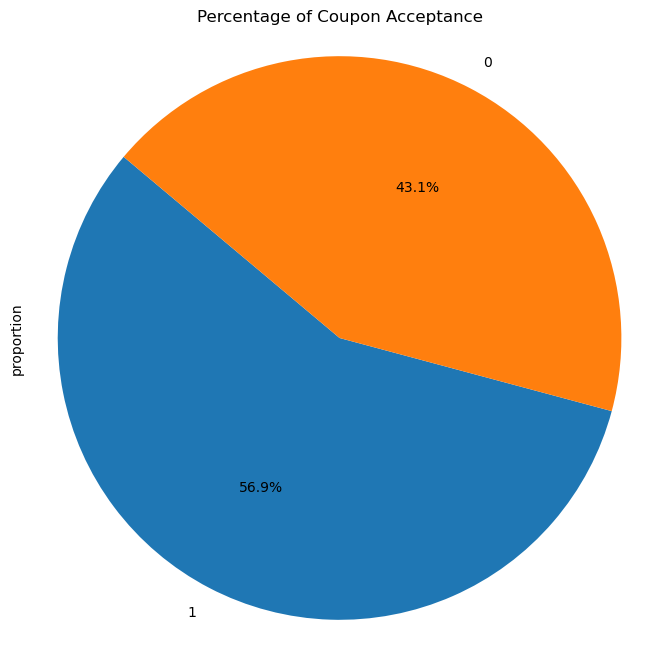

In [299]:
# Create DataFrame
Carry_coupons = pd.DataFrame(data)

# Calculate the percentage of coupon acceptance
coupon_pct = Carry_coupons['Coupon accep'].value_counts(normalize=True)

# Plot the percentage of coupon acceptance using a pie chart
plt.figure(figsize=(8, 8))
coupon_pct.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Coupon Acceptance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count of Coupon Acceptance')

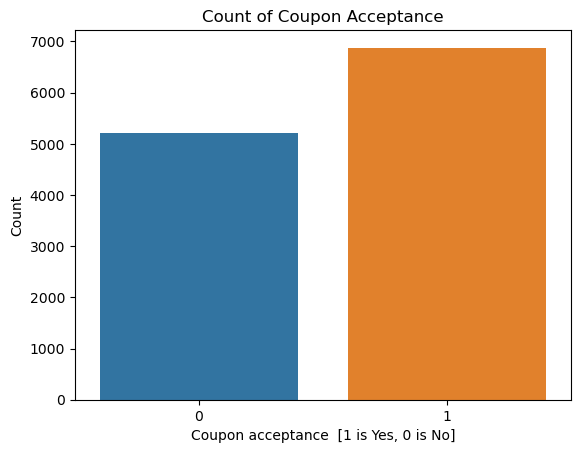

In [36]:
#Bar plot coupon accptance with Seaborn


sns.countplot(data = data, x = 'Coupon accep')

plt.xlabel('Coupon acceptance  [1 is Yes, 0 is No]')
plt.ylabel('Count')
plt.title('Count of Coupon Acceptance')

# 6. Use a histogram to visualize the temperature column.

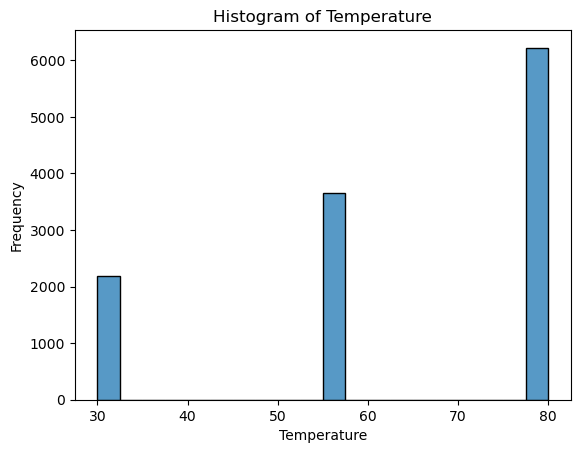

In [300]:
# Create the histogram
sns.histplot(data=data, x='temperature', bins=20)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Show the plot
plt.show()

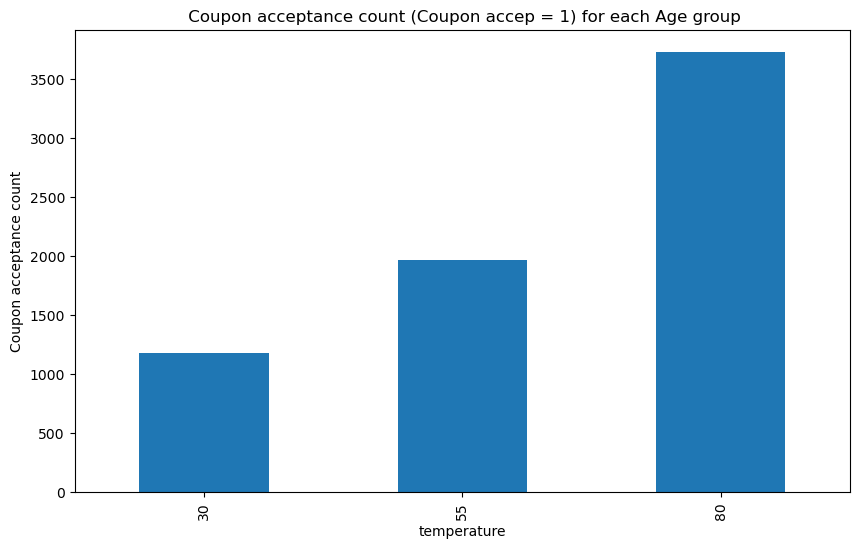

In [197]:
# Calculate the count of 'Coupon accep' equal to 1 for each 'temperature' value,

count_accepted = data[data['Coupon accep'] == 1].groupby('temperature').size() 
# Plot the count as a bar diagram

#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100
count_accepted.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('temperature')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each Age group')

# Show the plot
plt.show()

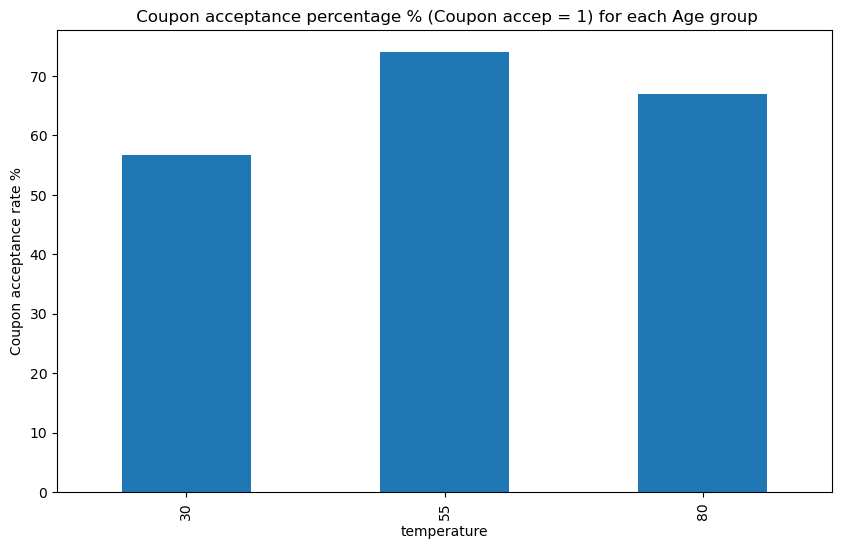

In [298]:
# Calculate the Percentage of 'Coupon accep' equal to 1 for each 'temperature' value,

#count_accepted = data[data['Coupon accep'] == 1].groupby('temperature').size() 
# Plot the count as a bar diagram

percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('temperature').size() / selected_groups.groupby('temperature').size() * 100
percentage_accepted.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('temperature')
plt.ylabel('Coupon acceptance rate %')
plt.title(' Coupon acceptance percentage % (Coupon accep = 1) for each Age group')

# Show the plot
plt.show()

In [200]:
data.sample(12)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon accep
7836,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,21,Single,...,4~8,1~3,less1,less1,1,1,1,0,1,0
3218,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,41,Married partner,...,less1,less1,1~3,1~3,1,1,0,0,1,0
1490,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),2h,Female,50,Unmarried partner,...,1~3,less1,1~3,1~3,1,0,0,0,1,1
10173,Home,Kid(s),Sunny,80,6PM,Restaurant(20-50),2h,Male,36,Married partner,...,less1,4~8,1~3,less1,1,1,0,1,0,1
9740,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,less1,never,1,0,0,0,1,1
11578,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,36,Unmarried partner,...,4~8,4~8,less1,less1,1,0,0,0,1,1
2269,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,21,Single,...,never,1~3,less1,never,1,0,0,0,1,1
569,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,1~3,less1,1,0,0,0,1,1
9545,Home,Partner,Sunny,30,10PM,Restaurant(<20),1d,Female,20,Unmarried partner,...,1~3,less1,1~3,less1,1,0,0,1,0,1
7782,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,1


# **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [81]:
# Create a new DataFrame containing only rows where 'coupon' column is 'bar'
bar_coupons = data[data['coupon'] == "Bar"]

# Display the new DataFrame
bar_coupons.sample(12)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon accep
5565,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,36,Married partner,...,less1,less1,1~3,less1,1,0,0,0,1,0
6874,Home,Alone,Sunny,55,6PM,Bar,2h,Female,50,Single,...,4~8,1~3,1~3,never,1,1,0,1,0,0
9542,Home,Alone,Rainy,55,6PM,Bar,1d,Female,20,Unmarried partner,...,1~3,less1,1~3,less1,1,1,1,0,1,1
1189,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,...,gt8,4~8,gt8,4~8,1,1,1,0,1,1
6708,Work,Alone,Rainy,55,7AM,Bar,1d,Male,21,Single,...,gt8,less1,1~3,never,1,0,0,0,1,1
2555,Work,Alone,Sunny,55,7AM,Bar,1d,Female,26,Single,...,4~8,4~8,4~8,less1,1,1,1,0,1,1
9942,Work,Alone,Rainy,55,7AM,Bar,1d,Female,21,Single,...,gt8,gt8,gt8,4~8,1,1,1,0,1,0
9872,Work,Alone,Sunny,30,7AM,Bar,1d,Male,36,Single,...,never,less1,less1,less1,1,1,0,1,0,1
9126,Home,Alone,Rainy,55,6PM,Bar,1d,Female,21,Married partner,...,gt8,4~8,1~3,1~3,1,1,1,0,1,1
6676,Home,Alone,Sunny,55,6PM,Bar,2h,Male,21,Single,...,1~3,4~8,1~3,less1,1,1,0,1,0,0


Text(0.5, 1.0, 'Count of Bar Coupon Acceptance')

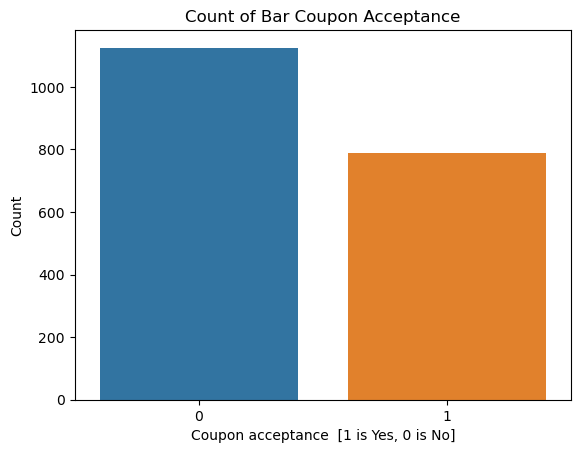

In [201]:
#Bar plot coupon accptance with Seaborn for Bar coupons


sns.countplot(data = bar_coupons, x = 'Coupon accep')

plt.xlabel('Coupon acceptance  [1 is Yes, 0 is No]')
plt.ylabel('Count')
plt.title('Count of Bar Coupon Acceptance')

# 2. What proportion of bar coupons were accepted?


In [46]:
# Calculate the total number of bar coupons
total_bar_coupons = len(bar_coupons)
print("Total bar coupons:", total_bar_coupons)

# Calculate the number of accepted bar coupons
accepted_bar_coupons = len(bar_coupons[bar_coupons['Coupon accep'] == 1])
print("Total accepted bar coupons:", accepted_bar_coupons)

# Calculate the proportion of accepted bar coupons
proportion_accepted = accepted_bar_coupons / total_bar_coupons

# Print the proportion

print("Proportion of accepted bar coupons:", proportion_accepted)

Total bar coupons: 1913
Total accepted bar coupons: 788
Proportion of accepted bar coupons: 0.41191845269210664


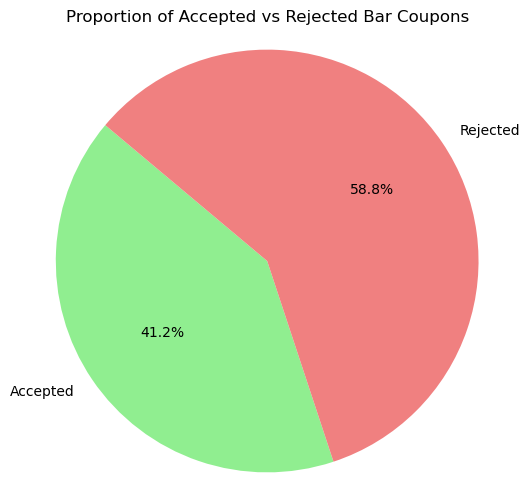

In [202]:
#Plot a pie diagram for the proportions of accepted and rejected bar coupons,
# Calculate the number of rejected bar coupons
rejected_bar_coupons = total_bar_coupons - accepted_bar_coupons

# Define labels for the pie chart
labels = ['Accepted', 'Rejected']

# Define sizes for the pie chart
sizes = [accepted_bar_coupons, rejected_bar_coupons]

# Define colors for the pie chart
colors = ['lightgreen', 'lightcoral']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Accepted vs Rejected Bar Coupons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [203]:
# Display the titles of all columns
print(bar_coupons.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Coupon accep'],
      dtype='object')


In [204]:
# View the values of the 'Bar' index directly
bar_values = bar_coupons['Bar']
print(bar_values)

24       never
35       never
39       never
46       never
57       never
         ...  
12663    never
12664    never
12667    never
12670    never
12682    never
Name: Bar, Length: 1913, dtype: object


In [205]:
#I will  use groupby and size to determine the count of drivers in each Bar group
Bar_groups = None

### BEGIN SOLUTION
Bar_groups = bar_coupons.groupby('Bar').size()
### END SOLUTION

# Answer check
print(Bar_groups)
print(type(Bar_groups))

Bar
1~3      379
4~8      147
gt8       46
less1    553
never    788
dtype: int64
<class 'pandas.core.series.Series'>


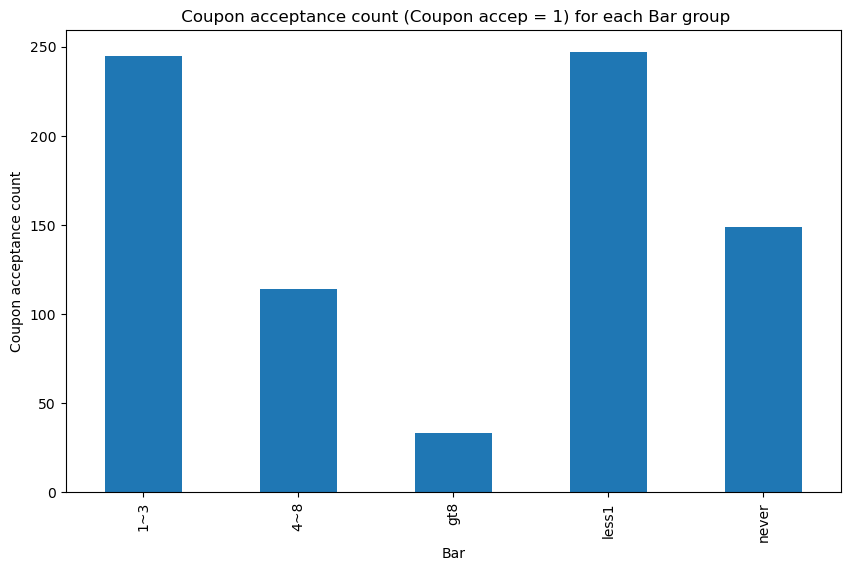

In [207]:
# Now I will Calculate the count of 'Coupon accep' equal to 1 for each 'Bar' value, 
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = bar_coupons[bar_coupons['Coupon accep'] == 1].groupby('Bar').size() 
# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Bar')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each Bar group')

# Show the plot
plt.show()

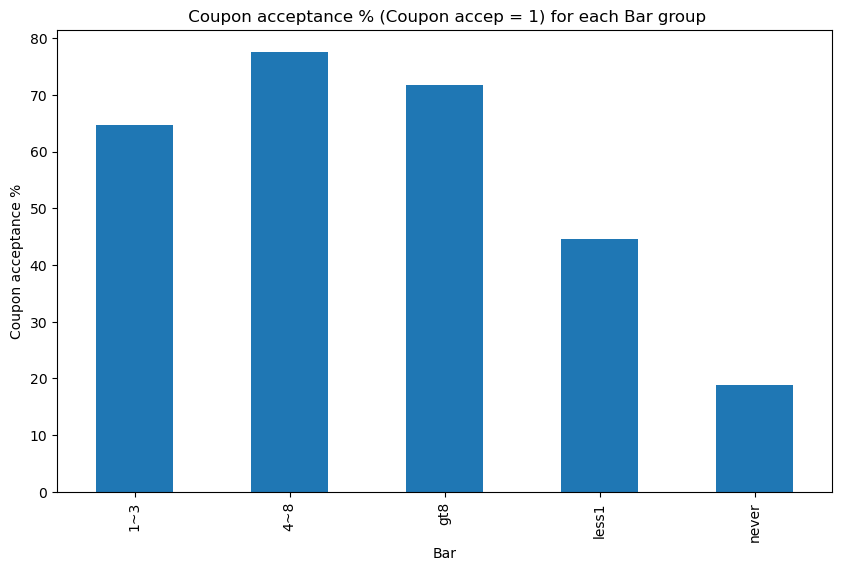

In [210]:
percentage_accepted = bar_coupons[bar_coupons['Coupon accep'] == 1].groupby('Bar').size() / bar_coupons.groupby('Bar').size() * 100

#percentage_accepted = bar_coupons[bar_coupons['Coupon accep'] == 1].groupby('Bar').size() 
# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Bar')
plt.ylabel('Coupon acceptance %')
plt.title(' Coupon acceptance % (Coupon accep = 1) for each Bar group')

# Show the plot
plt.show()

In [214]:
# Now to Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more. 
# I start by filtering  those who went to a bar 3 or fewer times a month
# Filter the DataFrame to include only the desired groups
bar_3L = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

# Calculate the percentage of 'Coupon accep' equal to 1 for Bar 3 or less
percent_bar_3L = (bar_3L['Coupon accep'] == 1).mean() * 100

print("acceptance rate who go to a bar 3 or fewer times a month: ", percent_bar_3L)


# Now filtering  those who went to a bar more than 3 times a month
# Filter the DataFrame to include only the desired groups
bar_M3 = bar_coupons[~bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]

# Calculate the percentage of 'Coupon accep' equal to 1 for Bar 3 or less
percent_bar_M3 = (bar_M3['Coupon accep'] == 1).mean() * 100

print("acceptance rate who go to a bar more than 3 times a month: ", percent_bar_M3)



acceptance rate who go to a bar 3 or fewer times a month:  37.26744186046512
acceptance rate who go to a bar more than 3 times a month:  76.16580310880829


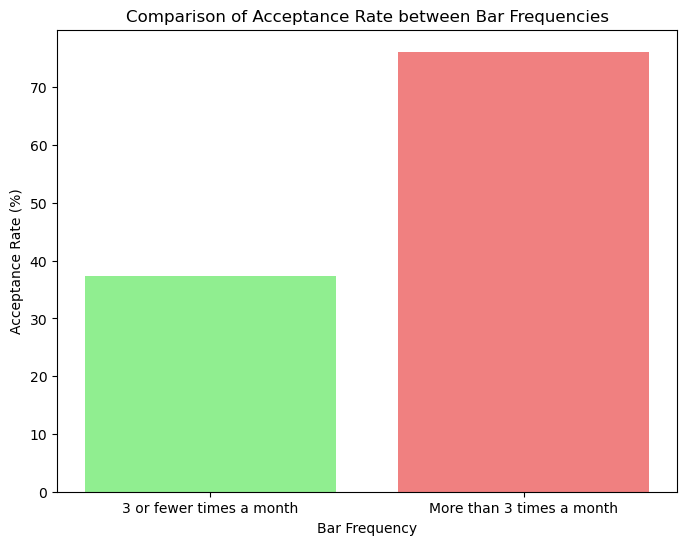

In [216]:
# Plot the result in Bar diagram to better visualize the data
# Data
labels = ['3 or fewer times a month', 'More than 3 times a month']
sizes = [percent_bar_3L, percent_bar_M3]
colors = ['lightgreen', 'lightcoral']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)

# Add labels and title
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.title('Comparison of Acceptance Rate between Bar Frequencies')

# Show the plot
plt.show()

In [ ]:
# Here is another way I used to calculate without using 'isin'
# same result was obtained

In [206]:
# Create a new DataFrame with only the 'Bar' 3 or fewer times a month

# Create a new DataFrame with only the 'Bar' 3 or fewer times a month
bar_3_or_fewer = bar_coupons[(bar_coupons['Bar'] == "1~3") | (bar_coupons['Bar'] == "never") | (bar_coupons['Bar'] == "less1")]

# Calculate the total number of individuals who went to a bar 3 or fewer times a month
total_bar_3_or_fewer = len(bar_3_or_fewer)
print("Total went to a bar 3 or fewer times a month:", total_bar_3_or_fewer)

# Calculate the number of accepted bar coupons among those who went to a bar 3 or fewer times a month
accepted_bar_3_or_fewer = len(bar_3_or_fewer[bar_3_or_fewer['Coupon accep'] == 1])
print("Total accepted bar coupons among those who went to a bar 3 or fewer times a month:", accepted_bar_3_or_fewer)

# Calculate the proportion of accepted bar coupons among those who went to a bar 3 or fewer times a month
proportion_3_or_fewer_accepted = accepted_bar_3_or_fewer / total_bar_3_or_fewer

# Print the proportion
print("Proportion of accepted bar coupons among those who went to a bar 3 or fewer times a month:", proportion_3_or_fewer_accepted)

Total went to a bar 3 or fewer times a month: 1720
Total accepted bar coupons among those who went to a bar 3 or fewer times a month: 641
Proportion of accepted bar coupons among those who went to a bar 3 or fewer times a month: 0.37267441860465117


In [68]:
# Create a new DataFrame with only the 'Bar' 4-8 or 8great times a month
bar_4_8_or_great = bar_coupons[(bar_coupons['Bar'] == "4~8") | (bar_coupons['Bar'] == "gt8")]

# Calculate the total number of individuals who went to a bar 4-8 or 8great times a month
total_bar_4_8_or_great = len(bar_4_8_or_great)
print("Total went to a bar 4-8 or 8great times a month:", total_bar_4_8_or_great)

# Calculate the number of accepted bar coupons among those who went to a bar 4-8 or 8great times a month
accepted_bar_4_8_or_great = len(bar_4_8_or_great[bar_4_8_or_great['Coupon accep'] == 1])
print("Total accepted bar coupons among those who went to a bar 4-8 or 8great times a month:", accepted_bar_4_8_or_great)

# Calculate the proportion of accepted bar coupons among those who went to a bar 4-8 or 8great times a month
proportion_4_8_or_great_accepted = accepted_bar_4_8_or_great / total_bar_4_8_or_great

# Print the proportion
print("Proportion of accepted bar coupons among those who went to a bar 4-8 or 8great times a month:", proportion_4_8_or_great_accepted)


Total went to a bar 4-8 or 8great times a month: 193
Total accepted bar coupons among those who went to a bar 4-8 or 8great times a month: 147
Proportion of accepted bar coupons among those who went to a bar 4-8 or 8great times a month: 0.7616580310880829


Acceptance rate of those who went to a bar 3 or fewer times a month is ~37.3% as compare to ~76.2% for those who went more than 3 times, which makes sense as drivers who goes tot he Bar more often are more likely to accept the Bar coupon 

# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [69]:
# I will start with using groupby and size to determine the count of people in each Bar group
Bar_groups = None

### BEGIN SOLUTION
Bar_groups = bar_coupons.groupby('Bar').size()
### END SOLUTION

# Answer check
print(Bar_groups)
print(type(Bar_groups))

Bar
1~3      379
4~8      147
gt8       46
less1    553
never    788
dtype: int64
<class 'pandas.core.series.Series'>


In [82]:
#Also  use groupby and size to determine the count of people in each age group
age_groups = None

### BEGIN SOLUTION
age_groups = bar_coupons.groupby('age').size()
### END SOLUTION

# Answer check
print(age_groups)
print(type(age_groups))


age
20     81
21    397
26    368
31    324
36    196
41    171
46    103
50    273
dtype: int64
<class 'pandas.core.series.Series'>


In [220]:

# Filter the DataFrame to include only the Bar groups that go more than once a month
bar_more1 = bar_coupons[bar_coupons['Bar'].isin(['gt8', '4~8', '1~3'])]


# Display a sample of the specific groups
print(bar_more1[['Bar', 'Coupon accep', 'age', 'occupation']].sample(15))

       Bar  Coupon accep  age                                occupation
10818  gt8             0   31                                     Legal
1378   1~3             1   41                   Computer & Mathematical
11715  gt8             1   21  Arts Design Entertainment Sports & Media
11085  1~3             1   50                    Production Occupations
1628   1~3             1   26      Healthcare Practitioners & Technical
4954   1~3             0   31                    Production Occupations
7789   gt8             0   26                                Unemployed
8884   4~8             1   26                        Healthcare Support
6004   4~8             1   26                                Unemployed
10366  1~3             0   26                   Computer & Mathematical
6250   4~8             1   41  Arts Design Entertainment Sports & Media
11037  1~3             0   46                           Sales & Related
11437  1~3             1   31                           Sales & 

acceptance rate between drivers who go to a bar more than once a month and are under the age of 25: 67.45562130177515
acceptance rate between drivers who go to a bar more than once a month and are over the age of 25: 68.98263027295285


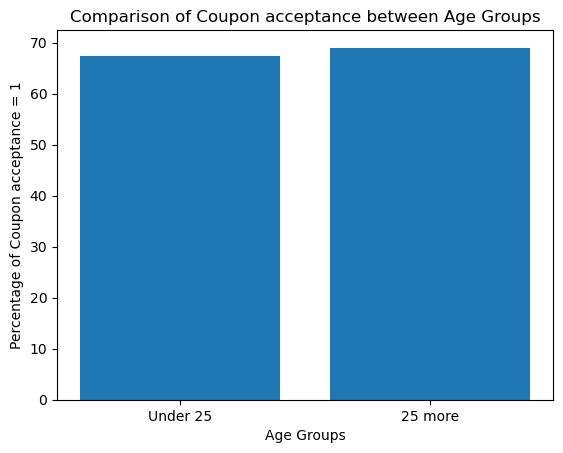

In [218]:

# Filter the DataFrame for 'age' values 20 and 21
age_25U = bar_more1[bar_more1['age'].isin([20, 21])]
# Calculate the percentage of 'Coupon accep' equal to 1 for age 20 and 21
percent_age_25U = (age_25U['Coupon accep'] == 1).mean() * 100

print("acceptance rate between drivers who go to a bar more than once a month and are under the age of 25:", percent_age_25U)


# Filter by 'age' column for over 25
bar_more1_o25 = bar_more1[bar_more1['age'].isin([31, 26, 36, 41, 46, 50])]


# Calculate the percentage of 'Coupon accep' equal to 1 for age 26, 31, 36, 41, 46, and 50
percent_bar_more1_o25 = (bar_more1_o25['Coupon accep'] == 1).mean() * 100

print("acceptance rate between drivers who go to a bar more than once a month and are over the age of 25:", percent_bar_more1_o25)



# Create a bar plot
plt.bar(['Under 25', '25 more'], [percent_age_25U, percent_bar_more1_o25])

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Coupon acceptance = 1')
plt.title('Comparison of Coupon acceptance between Age Groups')

# Show the plot
plt.show()

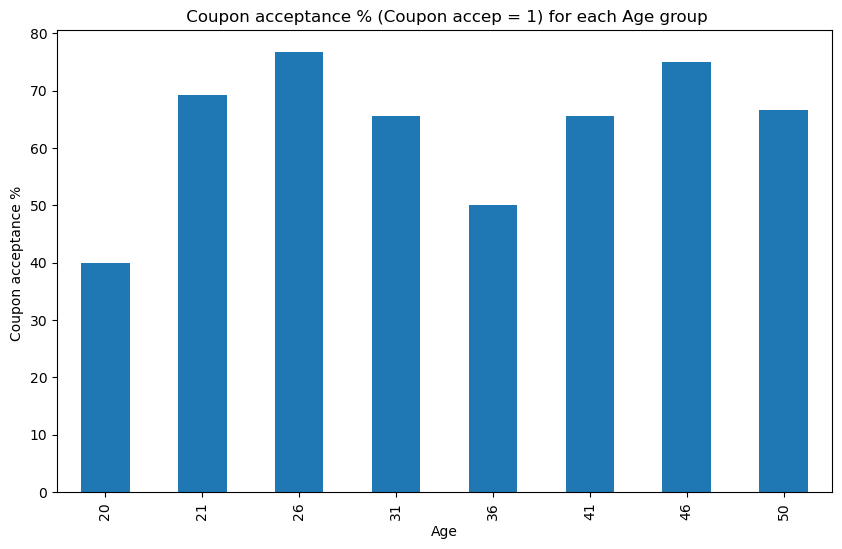

In [303]:
# Calculate the count of 'Coupon accep' equal to 1 for each 'age' value, just to ensure the result from the prvious disgram are correct
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

count_accepted = bar_more1[bar_more1['Coupon accep'] == 1].groupby('age').size()  / bar_more1.groupby('age').size() * 100

# Plot the count as a bar diagram
count_accepted.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Coupon acceptance % ')
plt.title(' Coupon acceptance % (Coupon accep = 1) for each Age group')

# Show the plot
plt.show()

In conclusion, the comparison between the acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 to all others indicates no significant difference. Both groups exhibit a high acceptance rate of over 2/3, suggesting that regardless of age, drivers who go to bars frequently tend to accept bar coupons at a similar rate. Therefore, age does not appear to significantly impact the acceptance rate among drivers who visit bars frequently.

# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [225]:
#Also  use groupby and size to determine the count of people in each passengers group 
# I will use bar_more1 for drivers who go to bars more than once a month
passenger_groups = None

### BEGIN SOLUTION
passanger_groups = bar_more1.groupby('passanger').size()
### END SOLUTION

# Answer check
print(passanger_groups)
print(type(passanger_groups))


passanger
Alone        341
Friend(s)    116
Kid(s)        42
Partner       73
dtype: int64
<class 'pandas.core.series.Series'>


In [230]:
# Filter the DataFrame for 'passanger' values NOT a kid
passanger_Nkid = bar_more1[~bar_more1['passanger'].isin(["Kid(s)"]) ]
# Calculate the percentage of 'Coupon accep' equal to Not kid
percent_Nkid = (passanger_Nkid['Coupon accep'] == 1).mean() * 100

print("acceptance rate between drivers who go to a bar more than once a month and without a kid:", percent_Nkid)


# Now I will add another Filter for the NOT kid dataframe had occupations other than farming, fishing, or forestry.

passanger_occup =  bar_more1[~bar_more1['passanger'].isin(["Kid(s)"]) &
                                  ~bar_more1['occupation'].isin(["farming", "fishing", "forestry"])]



percent_occup = (passanger_occup['Coupon accep'] == 1).mean() * 100



print("acceptance rate between drivers who go to a bar more than once a month and without a kid and had occupations other than farming, fishing, or forestry.:", percent_occup)




acceptance rate between drivers who go to a bar more than once a month and without a kid: 70.94339622641509
acceptance rate between drivers who go to a bar more than once a month and without a kid and had occupations other than farming, fishing, or forestry.: 70.94339622641509


The acceptance rate among drivers who go to a bar more than once a month and do not have a child is 71%, indicating a high acceptance rate, which is expected given their frequent bar visits. As for drivers with occupations other than farming, fishing, or forestry, there are none represented in the dataset of bar_more1 for drivers who go to bars more than once a month , so there is no change in their acceptance rate.

# 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [231]:
#Start with   groupby and size to determine the count of people in each maritalStatus group
maritalStatus_groups = None

### BEGIN SOLUTION
maritalStatus_groups = bar_more1.groupby('maritalStatus').size()
### END SOLUTION

# Answer check
print(maritalStatus_groups)
print(type(maritalStatus_groups))


maritalStatus
Divorced              15
Married partner      159
Single               270
Unmarried partner    128
dtype: int64
<class 'pandas.core.series.Series'>


In [237]:
# Let me start with drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed
# I will use bar_more1 for drivers who go to bars more than once a month
# Filter the DataFrame  for 'passanger' values NOT a kid and were not widowed
passanger_Nkid_Nwidowed =  bar_more1[~bar_more1['passanger'].isin(["Kid(s)"]) &
                                  ~bar_more1['maritalStatus'].isin(["Widowed"])]


# Calculate the percentage of 'Coupon accep' equal to Not kid
percent_Nkid_Nwidowed = (passanger_Nkid_Nwidowed['Coupon accep'] == 1).mean() * 100

print("acceptance rate between drivers who go to a bar more than once a month and without a kid as a passenger and were not widowed: ", percent_Nkid_Nwidowed)


# Let me now consider  drivers that go to bars more than once a month,  and are under the age of 30

# Filter the DataFrame (of seelcted group that  go to bars more than once a month) for 'passanger' values NOT a kid and were not widowed
passanger_U30 =  bar_more1[bar_more1['age'].isin([20, 21, 26])]


# Calculate the percentage of 'Coupon accep' equal to Not kid
percent_U30 = (passanger_U30['Coupon accep'] == 1).mean() * 100

print("acceptance rate between drivers who go to a bar more than once a month and Under the age of 30 is:  ", percent_U30)


# Now I will consider drivers that go to cheap restaurants more than 4 times a month and income is less than 50K

# Filter the DataFrame (bar_coupons that received bar coupon) for 'passanger' values NOT a kid and were not widowed
driver_cheap4_50k =  bar_coupons[bar_coupons['RestaurantLessThan20'].isin(["4~8", "gt8"]) &
                          bar_coupons['income'].isin(["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"])]


# Calculate the percentage of 'Coupon accep' equal to Not kid
percent_cheap4_50k = (driver_cheap4_50k['Coupon accep'] == 1).mean() * 100

print("acceptance rate between drivers who not necessarly go to a bar more than once a month and go to cheap restaurants more than 4 times a month and has income is less than 50K:  ", percent_cheap4_50k)





acceptance rate between drivers who go to a bar more than once a month and without a kid as a passenger and were not widowed:  70.94339622641509
acceptance rate between drivers who go to a bar more than once a month and Under the age of 30 is:   71.95121951219512
acceptance rate between drivers who not necessarly go to a bar more than once a month and go to cheap restaurants more than 4 times a month and has income is less than 50K:   45.645645645645644


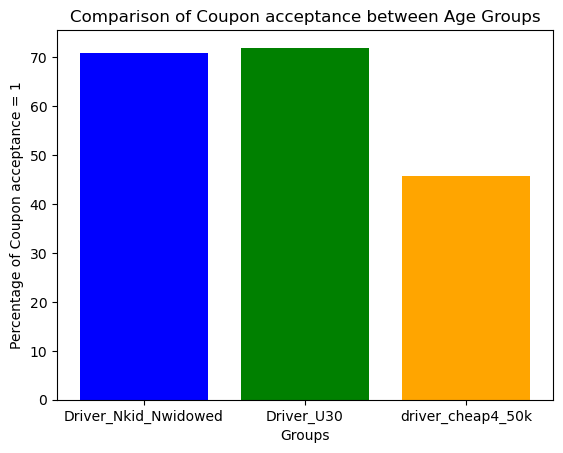

In [238]:
# Create a bar plot to compare them with different colors
plt.bar(['Driver_Nkid_Nwidowed', 'Driver_U30', 'driver_cheap4_50k'], 
        [percent_Nkid_Nwidowed, percent_U30, percent_cheap4_50k], 
        color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Percentage of Coupon acceptance = 1')
plt.title('Comparison of Coupon acceptance between Age Groups')

# Show the plot
plt.show()


Based on the  results:

The acceptance rate among drivers who go to a bar more than once a month and do not have a child as a passenger, and are not widowed, is approximately 70.94%. This suggests that this group of drivers tends to have a relatively high acceptance rate for bar coupons.

The acceptance rate among drivers who go to a bar more than once a month and are under the age of 30 is approximately 71.95%. This indicates that younger drivers who frequent bars frequently also exhibit a high acceptance rate for bar coupons.

In contrast, the acceptance rate among drivers who may not necessarily go to a bar more than once a month but visit cheap restaurants more than 4 times a month and have an income of less than 50K is approximately 45.65%. This suggests that this group of drivers has a lower acceptance rate for bar coupons compared to the other two groups.

Overall, the results indicate variations in acceptance rates based on different demographic and behavioral factors among drivers.

# 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations provided:

Frequency of Bar Visits: Drivers who go to a bar more than three times a month have a significantly higher acceptance rate for bar coupons (~76.2%) compared to those who go three or fewer times (~37.3%). This suggests that frequent bar visitors are more likely to accept bar coupons, which aligns with the expectation that individuals who frequent bars may be more inclined to take advantage of such offers.

Age Factor: The comparison between drivers under the age of 25 and those over the age of 25 who go to a bar more than once a month indicates no significant difference in acceptance rates. Both groups exhibit high acceptance rates of over 2/3 (~67.5% and ~69%, respectively). This suggests that age does not play a significant role in determining the acceptance rate among drivers who visit bars frequently.

Child Passengers and Marital Status: Drivers who go to a bar more than once a month and do not have a child as a passenger, and are not widowed, demonstrate a relatively high acceptance rate for bar coupons (~71%). This indicates that this demographic segment tends to be more receptive to bar coupons, possibly due to their lifestyle choices or disposable income.

Behavioral Patterns: On the other hand, drivers who may not necessarily go to a bar more than once a month but visit cheap restaurants more than four times a month and have an income of less than 50K show a lower acceptance rate for bar coupons (~45.6%). This suggests that behavioral patterns, such as dining preferences and income level, can influence the acceptance of bar coupons.

Overall, these observations highlight the variability in acceptance rates among drivers based on demographic factors, frequency of bar visits, and behavioral patterns. Factors such as age, presence of child passengers, marital status, and income level can all contribute to differences in acceptance rates among drivers.


# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

coupon
Bar                      41.191845
Carry out & Take away    73.771930
Coffee House             49.633124
Restaurant(20-50)        44.601270
Restaurant(<20)          70.900867
dtype: float64
<class 'pandas.core.series.Series'>


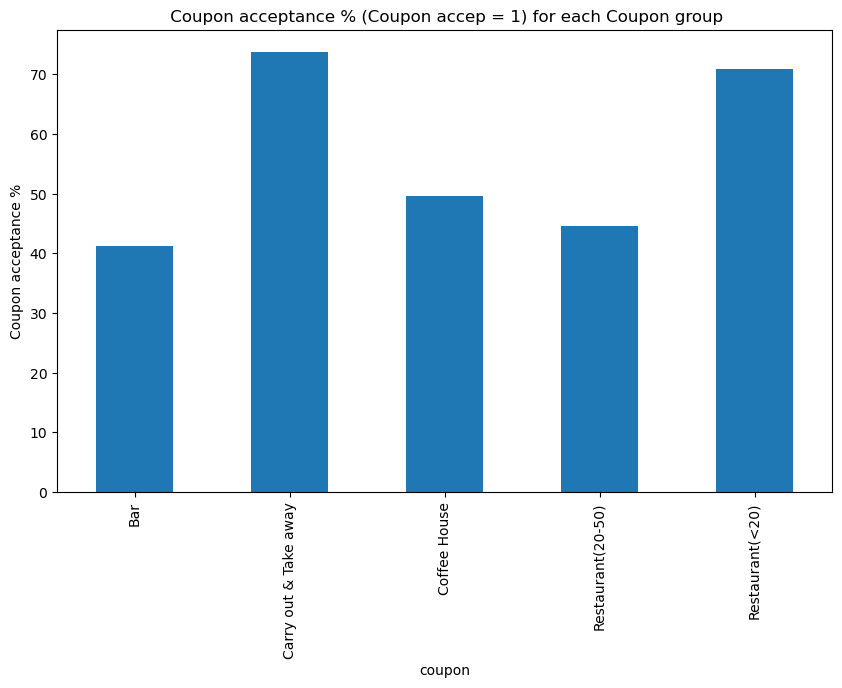

In [316]:
# Calculate the count of 'Coupon accep' equal to 1 for each 'age' value, just to ensure the result from the prvious disgram are correct
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = data[data['Coupon accep'] == 1].groupby('coupon').size() / data.groupby('coupon').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('coupon')
plt.ylabel('Coupon acceptance %')
plt.title(' Coupon acceptance % (Coupon accep = 1) for each Coupon group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

In [ ]:
#I decided to shoose "Carry out & Take away" 'coupon' to do my anaylysis as similar to the Bar analysis

In [315]:
# Create a new DataFrame containing only rows where 'coupon' column is 'bar'
Carry_coupons = data[data['coupon'] == "Carry out & Take away"]

# Display the new DataFrame
Carry_coupons.sample(12)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon accep
10093,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,31,Single,...,less1,4~8,1~3,1~3,1,1,0,1,0,0
7845,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Female,31,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,1
8683,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,26,Single,...,1~3,less1,1~3,less1,1,1,0,1,0,0
3913,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,26,Single,...,never,1~3,less1,less1,1,1,0,0,1,1
9933,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Female,21,Single,...,gt8,gt8,gt8,4~8,1,0,0,0,1,1
8026,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,21,Single,...,1~3,1~3,less1,less1,1,1,0,1,0,1
9484,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Male,31,Married partner,...,1~3,less1,4~8,less1,1,1,0,1,0,0
8311,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,26,Married partner,...,1~3,1~3,4~8,4~8,1,1,0,1,0,1
9428,No Urgent Place,Friend(s),Sunny,30,10PM,Carry out & Take away,1d,Male,36,Single,...,less1,gt8,gt8,never,1,1,0,0,1,1
2518,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,50,Married partner,...,4~8,4~8,gt8,gt8,1,1,0,0,1,0


In [317]:
# What proportion of Carry coupons were accepted?
# Calculate the total number of Carry coupons
total_Carry_coupons = len(Carry_coupons)
print("Total Carry coupons:", total_Carry_coupons)

# Calculate the number of accepted Carry coupons
accepted_Carry_coupons = len(Carry_coupons[Carry_coupons['Coupon accep'] == 1])
print("Total accepted Carry_coupons:", accepted_Carry_coupons)

# Calculate the proportion of accepted bar coupons
proportion_accepted = accepted_Carry_coupons / total_Carry_coupons

# Print the proportion

print("Proportion of accepted Carry_coupons:", proportion_accepted)


    
   


Total Carry coupons: 2280
Total accepted Carry_coupons: 1682
Proportion of accepted Carry_coupons: 0.737719298245614


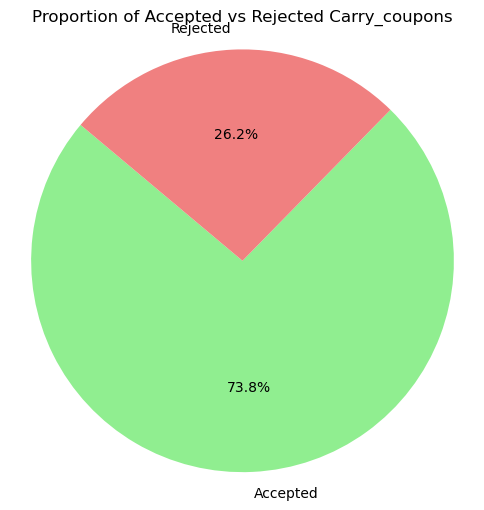

In [246]:
 #Plot a pie diagram for the proportions of accepted and rejected bar coupons,
# Calculate the number of rejected bar coupons
rejected_Carry_coupons = total_Carry_coupons - accepted_Carry_coupons

# Define labels for the pie chart
labels = ['Accepted', 'Rejected']

# Define sizes for the pie chart
sizes = [accepted_Carry_coupons, rejected_Carry_coupons]

# Define colors for the pie chart
colors = ['lightgreen', 'lightcoral']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Accepted vs Rejected Carry_coupons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [318]:
print(Carry_coupons.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Coupon accep'],
      dtype='object')


age
20    72.115385
21    74.034335
26    73.469388
31    71.891892
36    74.476987
41    73.039216
46    71.900826
50    77.014925
dtype: float64
<class 'pandas.core.series.Series'>


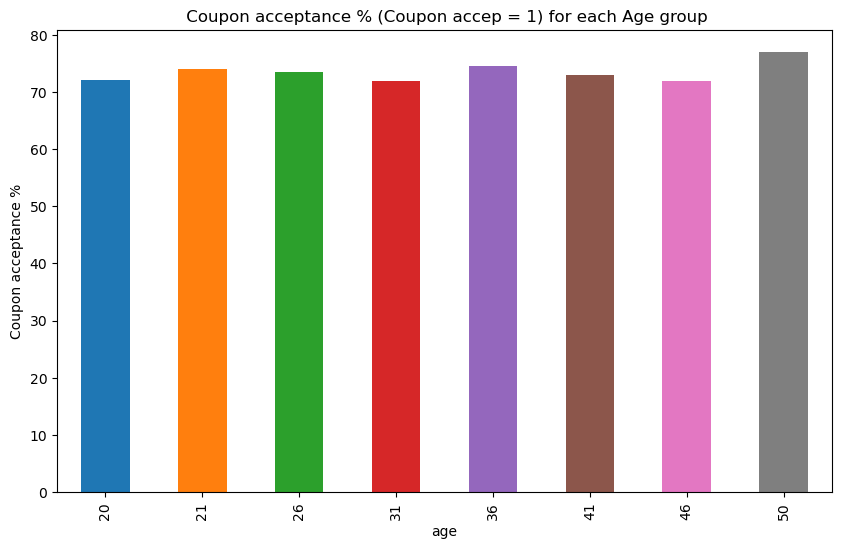

In [321]:
# exmplore the impat of age on carry out
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('age').size() / Carry_coupons.groupby('age').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('age')
plt.ylabel('Coupon acceptance %')
plt.title(' Coupon acceptance % (Coupon accep = 1) for each Age group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

Acceptance rate for "Carry out & Take away" coupon is high for all ages...
However, it is a bit higher for ages 50 and above, this is exoected as these age group are more liky to order take out. 

weather
Rainy    61.129568
Snowy    71.575342
Sunny    76.407825
dtype: float64
<class 'pandas.core.series.Series'>


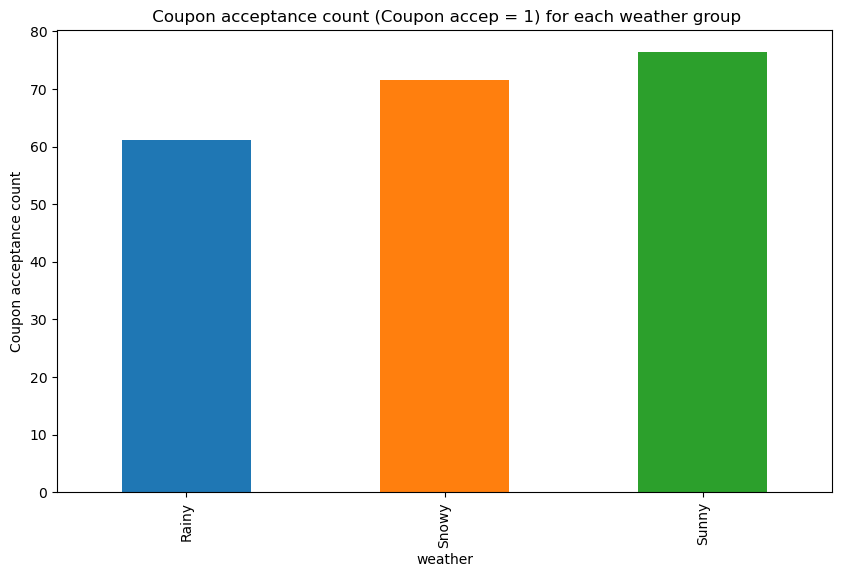

In [322]:
# exmplore the impat of weather on carry out
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('weather').size() / Carry_coupons.groupby('weather').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6), color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('weather')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each weather group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

In [ ]:
#acceptance rate is higher when the wethaer is not rainy or snowy


CarryAway
1~3      614
4~8      590
gt8      223
less1    233
never     22
dtype: int64 CarryAway
1~3      830
4~8      783
gt8      296
less1    343
never     28
dtype: int64
<class 'pandas.core.series.Series'>


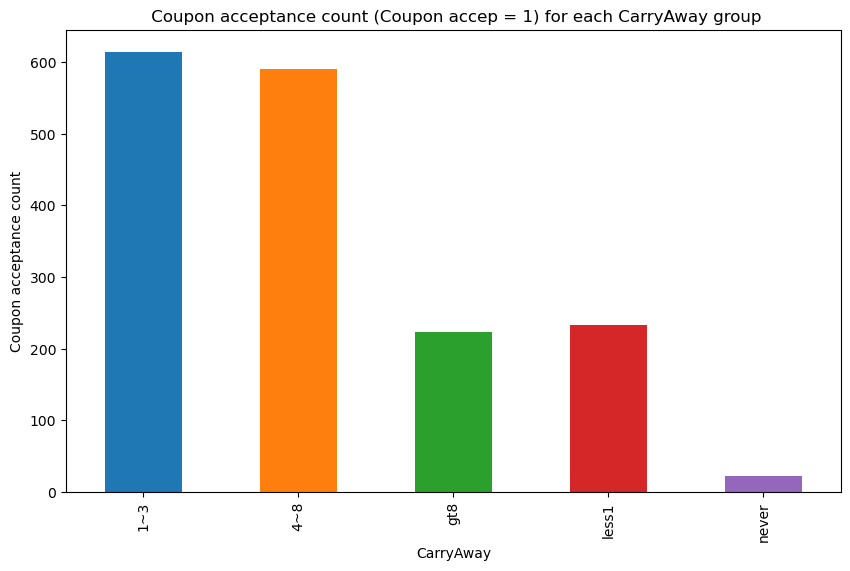

In [328]:
# now CarryAway 
# exmplore the impat of CarryAway on carry out
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('CarryAway').size()  

allcarry_out = Carry_coupons.groupby('CarryAway').size() 

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('CarryAway')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each CarryAway group')

# Show the plot
print(percentage_accepted, allcarry_out)
print(type(percentage_accepted))
plt.show()


In [325]:
# no significant observation


In [ ]:
# explore has_children

has_children
0    73.688213
1    73.886010
dtype: float64
<class 'pandas.core.series.Series'>


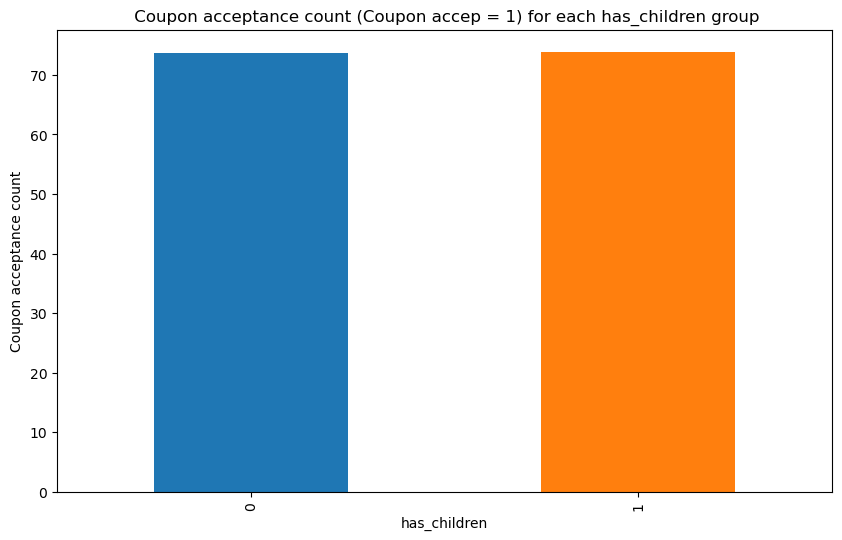

In [253]:
# now has_children 
# exmplore the impat of has_children on carry out
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('has_children').size() / Carry_coupons.groupby('has_children').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('has_children')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each has_children group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


has_children
0    73.688213
1    73.886010
dtype: float64
<class 'pandas.core.series.Series'>


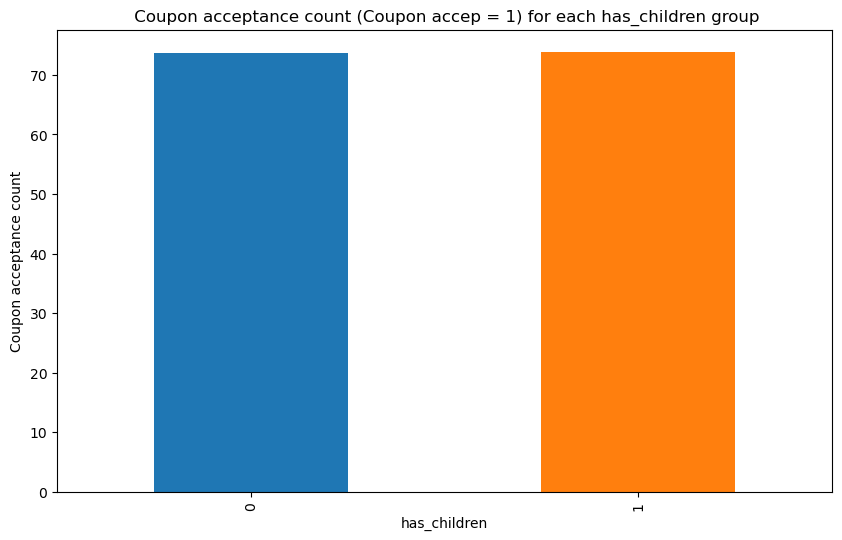

In [329]:
# now has_children 
# exmplore the impat of has_children on carry out
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('has_children').size() / Carry_coupons.groupby('has_children').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('has_children')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each has_children group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


In [330]:
# # no significant observation if has children or no


income
$100000 or More     69.841270
$12500 - $24999     75.465839
$25000 - $37499     78.296703
$37500 - $49999     72.012579
$50000 - $62499     77.419355
$62500 - $74999     72.611465
$75000 - $87499     67.088608
$87500 - $99999     71.250000
Less than $12500    74.879227
dtype: float64
<class 'pandas.core.series.Series'>


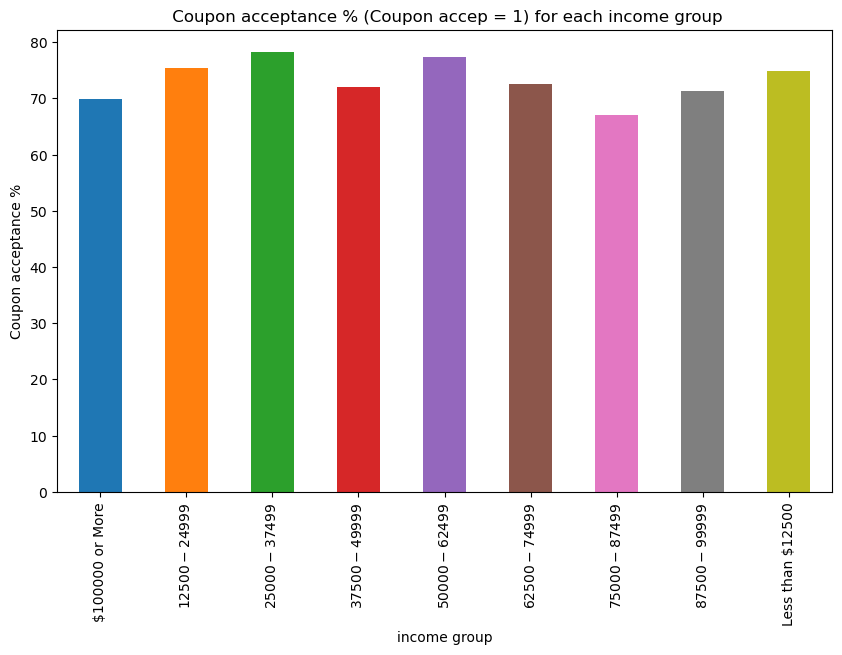

In [331]:
# now explore the impact of  income 
# exmplore the impat of income on carry out
#percentage_accepted = selected_groups[selected_groups['Coupon accep'] == 1].groupby('age').size() / selected_groups.groupby('age').size() * 100

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('income').size() / Carry_coupons.groupby('income').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('income group')
plt.ylabel('Coupon acceptance %')
plt.title(' Coupon acceptance % (Coupon accep = 1) for each income group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


In [ ]:
#Income group $25000 - $37499 has highest acceptance...the higher the income the less acceptance for carry out coupon

direction_same
0    1147
1     535
dtype: int64
<class 'pandas.core.series.Series'>


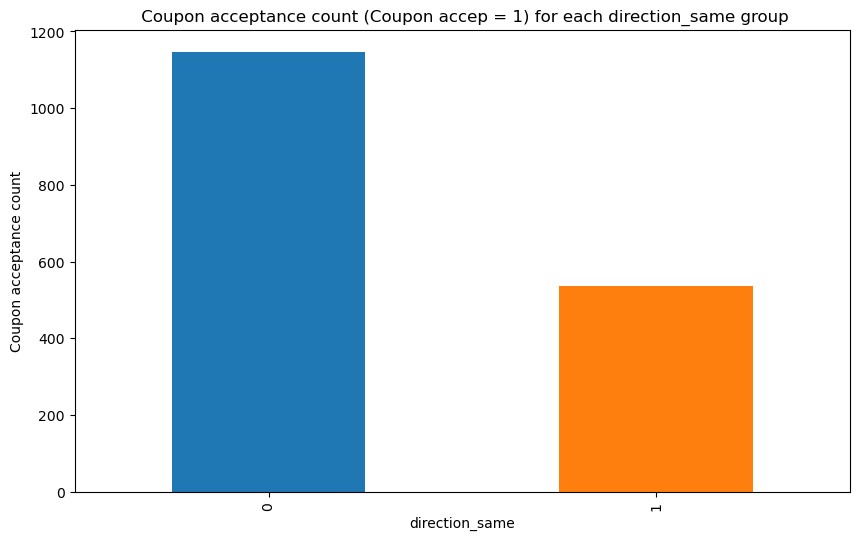

In [332]:
   # now explore the impact of direction_same 
# exmplore the impat of direction_same on carry out

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('direction_same').size() #/ Carry_coupons.groupby('direction_same').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('direction_same')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each direction_same group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


In [ ]:
# surprisegly, drivers doing in the opposite direct tend to accept more coupons. 

RestaurantLessThan20
1~3      72.867420
4~8      74.615385
gt8      75.536481
less1    72.351421
never    86.486486
dtype: float64
<class 'pandas.core.series.Series'>


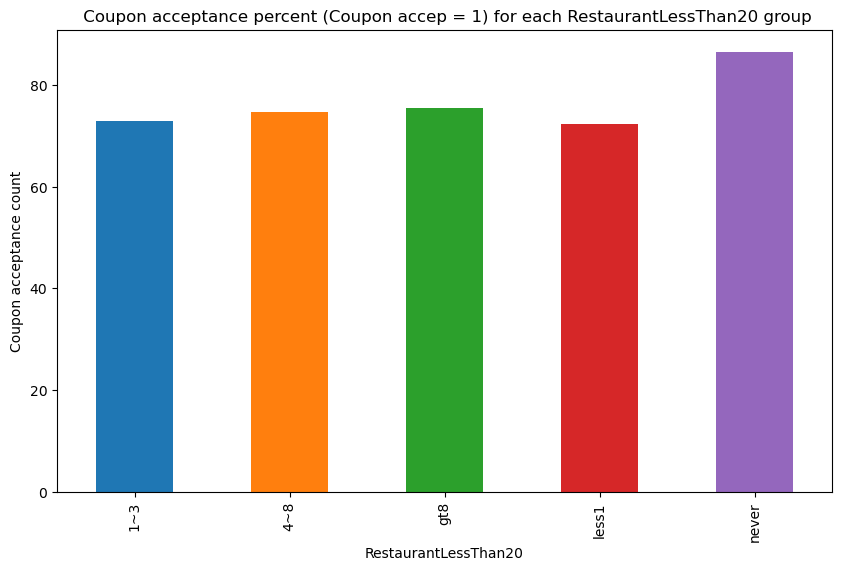

In [259]:

# now explore the impact of RestaurantLessThan20 
# exmplore the impat of RestaurantLessThan20 on carry out

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('RestaurantLessThan20').size() / Carry_coupons.groupby('RestaurantLessThan20').size() * 100

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance percent (Coupon accep = 1) for each RestaurantLessThan20 group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


In [ ]:
# rate and count difference

RestaurantLessThan20
1~3      709
4~8      485
gt8      176
less1    280
never     32
dtype: int64
<class 'pandas.core.series.Series'>


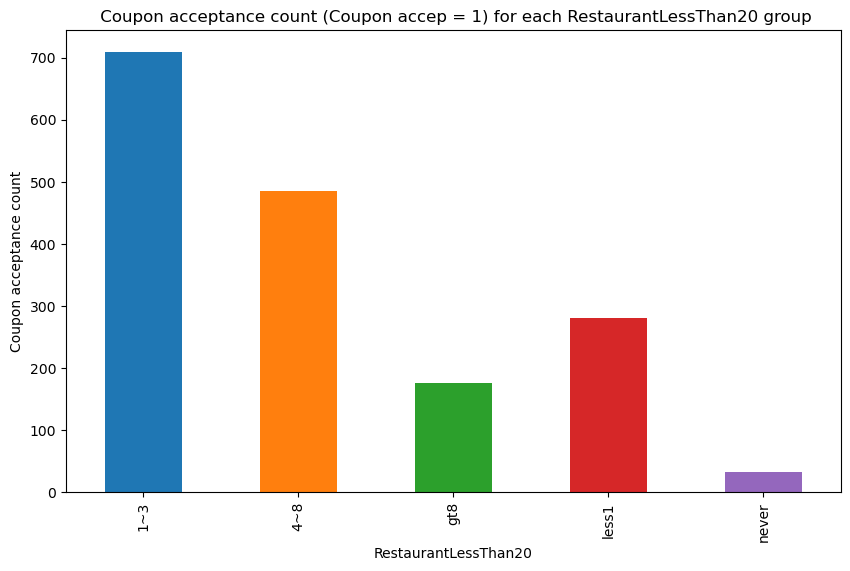

In [260]:
# now explore the impact of RestaurantLessThan20 
# exmplore the impat of RestaurantLessThan20 on carry out

percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('RestaurantLessThan20').size() 

# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance count (Coupon accep = 1) for each RestaurantLessThan20 group')

# Show the plot
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


CoffeeHouse
1~3      438
4~8      235
gt8      133
less1    458
never    418
dtype: int64
CoffeeHouse
1~3      74.744027
4~8      73.208723
gt8      60.730594
less1    75.577558
never    76.277372
dtype: float64
<class 'pandas.core.series.Series'>


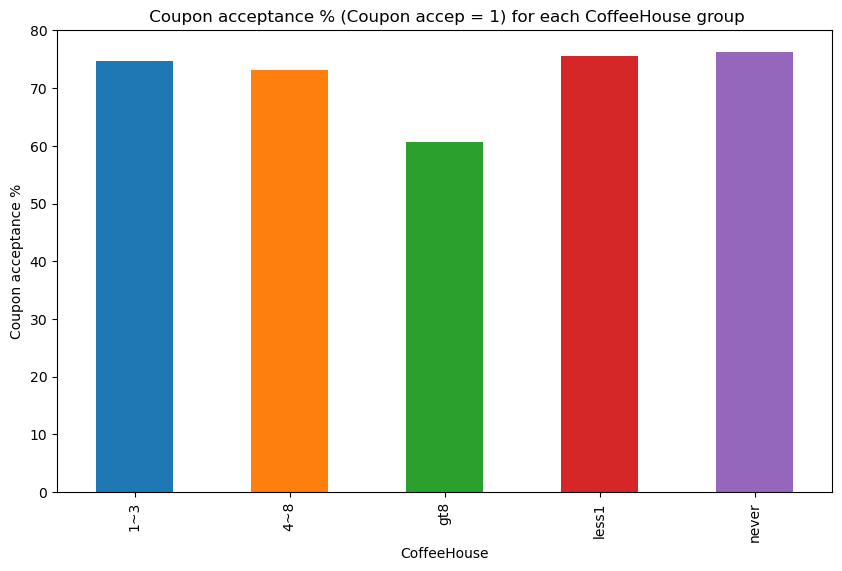

In [333]:

#CoffeeHouse 
# now explore the impact of RestaurantLessThan20 
# exmplore the impat of RestaurantLessThan20 on carry out

accepted_count = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('CoffeeHouse').size() 


percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('CoffeeHouse').size() / Carry_coupons.groupby('CoffeeHouse').size() * 100


# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('CoffeeHouse')
plt.ylabel('Coupon acceptance %')
plt.title(' Coupon acceptance % (Coupon accep = 1) for each CoffeeHouse group')

# Show the plot
print(accepted_count)
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()


In [ ]:
# time', 'expiration', 'gender',  'maritalStatus

time
10AM    343
10PM    337
2PM     181
6PM     339
7AM     482
dtype: int64
time
10AM    70.000000
10PM    76.765376
2PM     86.602871
6PM     82.082324
7AM     66.117970
dtype: float64
<class 'pandas.core.series.Series'>


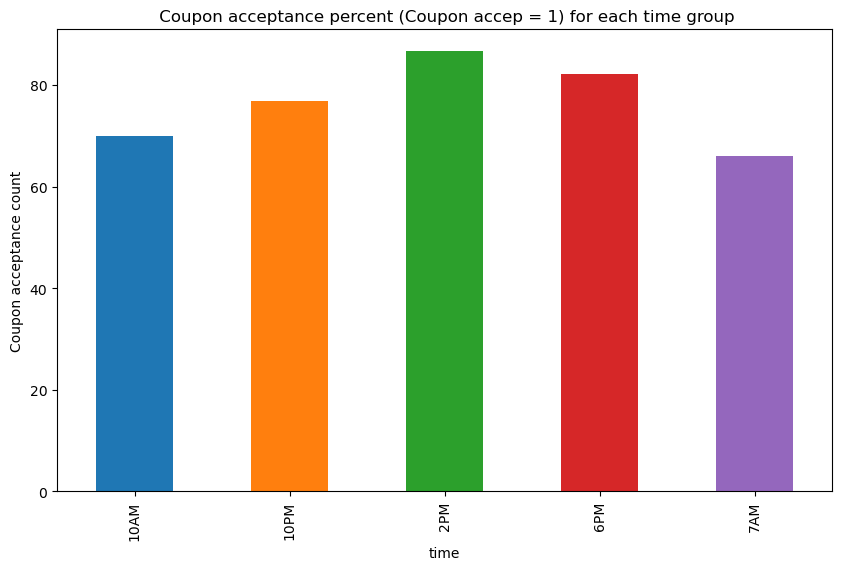

In [264]:
#time 
# now explore the impact of time 
# exmplore the impat of time on carry out

accepted_count = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('time').size() 


percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('time').size() / Carry_coupons.groupby('time').size() * 100


# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('time')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance percent (Coupon accep = 1) for each time group')

# Show the plot
print(accepted_count)
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

In [ ]:
## makes sense...2 PM lunch time and 6 pm dinner time both has highest acceptance rate...
#lunch is more as people tend to dine in for dinner 

gender
Female    841
Male      841
dtype: int64
gender
Female    71.513605
Male      76.177536
dtype: float64
<class 'pandas.core.series.Series'>


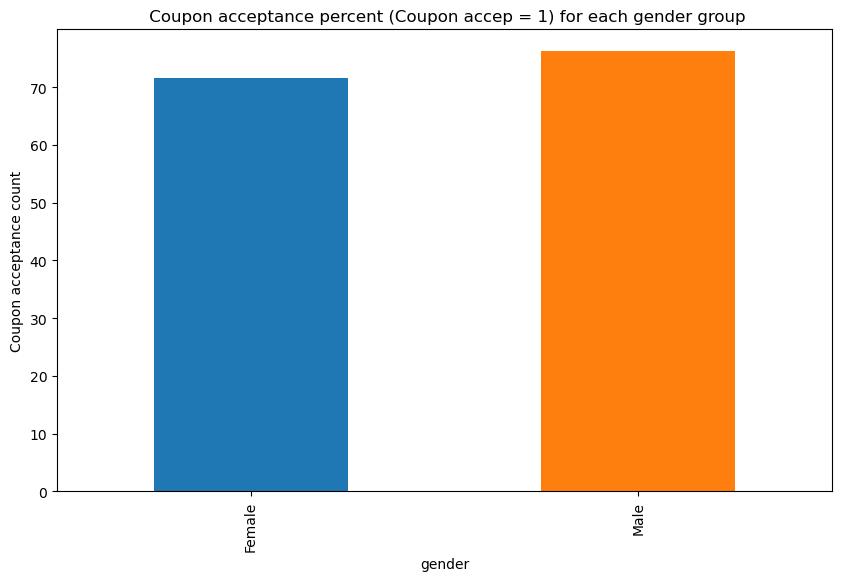

In [265]:
#gender 
# now explore the impact of gender 
# exmplore the impat of gender on carry out

accepted_count = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('gender').size() 


percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('gender').size() / Carry_coupons.groupby('gender').size() * 100


# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('gender')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance percent (Coupon accep = 1) for each gender group')

# Show the plot
print(accepted_count)
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

In [ ]:
## male tend to accept more for take out than females... 

maritalStatus
Divorced              78
Married partner      652
Single               677
Unmarried partner    258
Widowed               17
dtype: int64
maritalStatus
Divorced             72.222222
Married partner      72.930649
Single               75.727069
Unmarried partner    70.879121
Widowed              85.000000
dtype: float64
<class 'pandas.core.series.Series'>


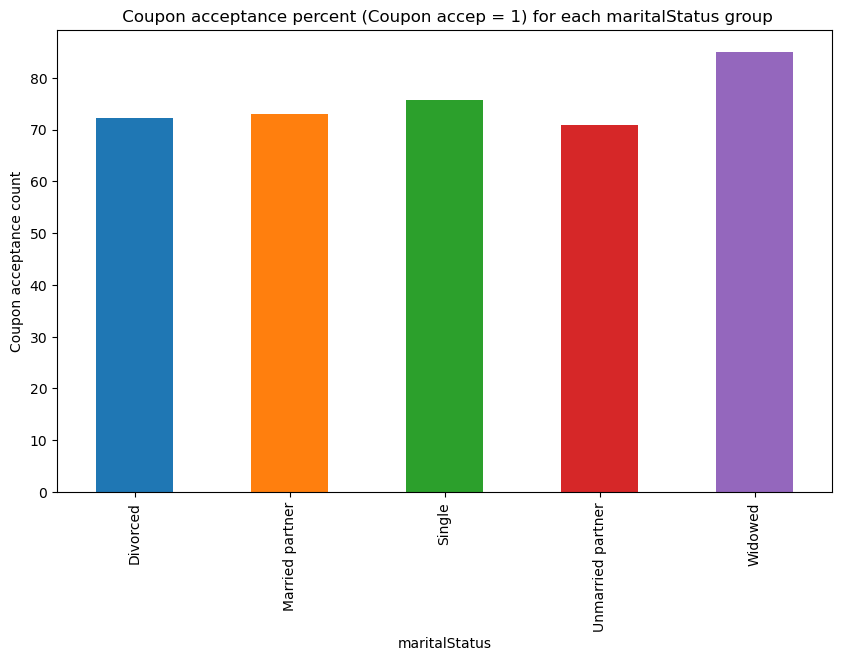

In [271]:
#maritalStatus 
# now explore the impact of maritalStatus 
# exmplore the impat of maritalStatus on carry out

accepted_count = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('maritalStatus').size() 


percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('maritalStatus').size() / Carry_coupons.groupby('maritalStatus').size() * 100


# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('maritalStatus')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance percent (Coupon accep = 1) for each maritalStatus group')

# Show the plot
print(accepted_count)
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

In [ ]:
##single and widowed shold be in one group and highest acceptance.. 
#easer to order take out for singles than to cook or dine in

occupation
Architecture & Engineering                    19
Arts Design Entertainment Sports & Media      70
Building & Grounds Cleaning & Maintenance      9
Business & Financial                          80
Community & Social Services                   32
Computer & Mathematical                      181
Construction & Extraction                     27
Education&Training&Library                   115
Farming Fishing & Forestry                     8
Food Preparation & Serving Related            48
Healthcare Practitioners & Technical          37
Healthcare Support                            40
Installation Maintenance & Repair             15
Legal                                         22
Life Physical Social Science                  15
Management                                   108
Office & Administrative Support               90
Personal Care & Service                       26
Production Occupations                        18
Protective Service                            30
Retired  

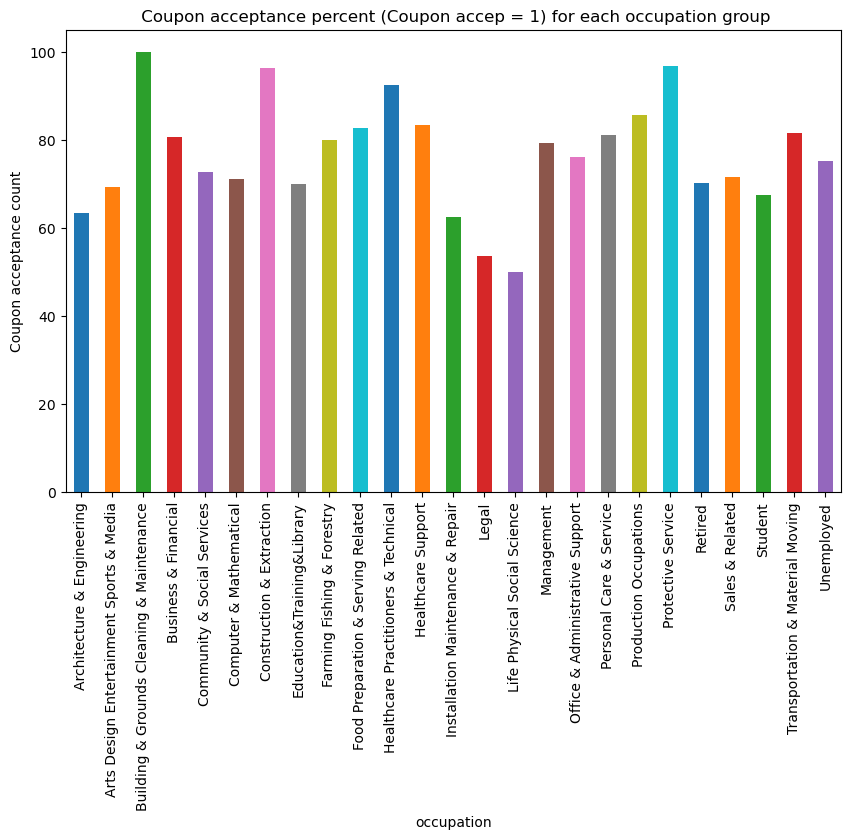

In [268]:
#occupation
 
# now explore the impact of occupation 
# exmplore the impat of occupation on carry out

accepted_count = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('occupation').size() 


percentage_accepted = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('occupation').size() / Carry_coupons.groupby('occupation').size() * 100


# Plot the count as a bar diagram
percentage_accepted.plot(kind='bar', figsize=(10, 6),color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('occupation')
plt.ylabel('Coupon acceptance count')
plt.title(' Coupon acceptance percent (Coupon accep = 1) for each occupation group')

# Show the plot
print(accepted_count)
print(percentage_accepted)
print(type(percentage_accepted))
plt.show()

Count of accepted coupons for each occupation group:
occupation
Architecture & Engineering                    19
Arts Design Entertainment Sports & Media      70
Building & Grounds Cleaning & Maintenance      9
Business & Financial                          80
Community & Social Services                   32
Computer & Mathematical                      181
Construction & Extraction                     27
Education&Training&Library                   115
Farming Fishing & Forestry                     8
Food Preparation & Serving Related            48
Healthcare Practitioners & Technical          37
Healthcare Support                            40
Installation Maintenance & Repair             15
Legal                                         22
Life Physical Social Science                  15
Management                                   108
Office & Administrative Support               90
Personal Care & Service                       26
Production Occupations                        18
Prote

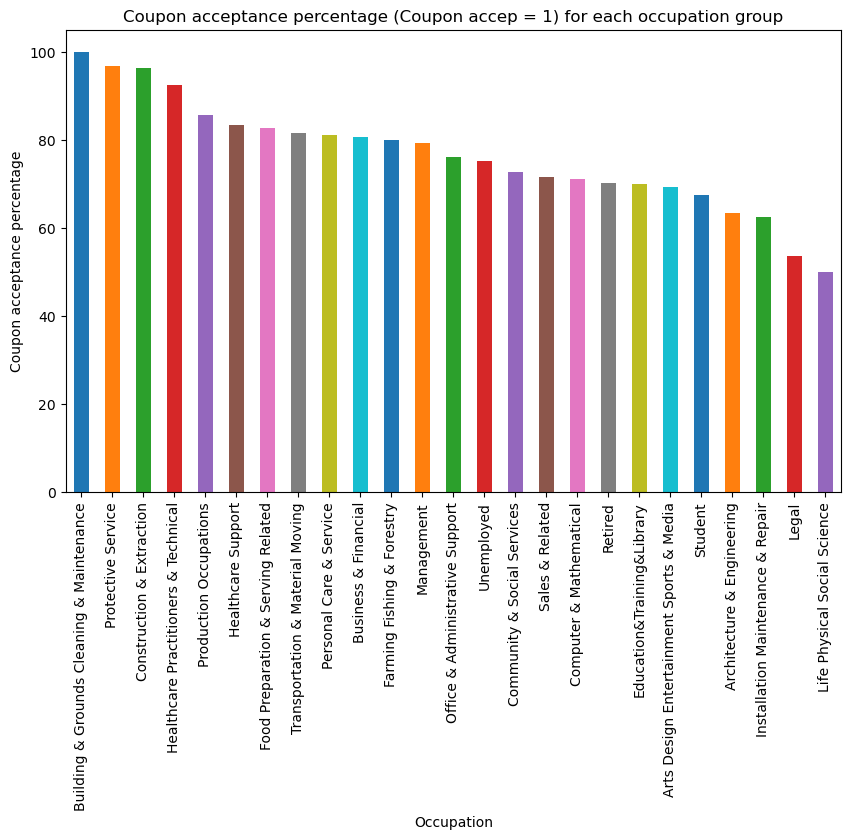

In [272]:
#Repeat  for occupation but sort the bars

# Calculate the count of accepted coupons for each occupation group
accepted_count = Carry_coupons[Carry_coupons['Coupon accep'] == 1].groupby('occupation').size()

# Calculate the percentage of accepted coupons for each occupation group
percentage_accepted = accepted_count / Carry_coupons.groupby('occupation').size() * 100

# Sort the occupation groups based on acceptance rate
percentage_accepted_sorted = percentage_accepted.sort_values(ascending=False)

# Plot the count as a bar diagram with automatic coloring
percentage_accepted_sorted.plot(kind='bar', figsize=(10, 6), color=plt.cm.tab10.colors)

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Coupon acceptance percentage')
plt.title('Coupon acceptance percentage (Coupon accep = 1) for each occupation group')

# Show the plot
print("Count of accepted coupons for each occupation group:")
print(accepted_count)
print("\nPercentage of accepted coupons for each occupation group:")
print(percentage_accepted_sorted)
plt.show()

Interesting finding; occupations: "Building & Grounds Cleaning & Maintenance", "Protective Service"              , "Construction & Extraction" ,  "Healthcare Practitioners & Technical" has the highest Carry on coupon acceptancerate %90+ 

On the other hand lowest acceptance rate is for occupations: 
Arts Design Entertainment Sports & Media      69.306931
Student                                       67.457627
Architecture & Engineering                    63.333333
Installation Maintenance & Repair             62.500000
Legal                                         53.658537
Life Physical Social Science                  50.000000


In [295]:
# Do multivariable analysis 'gender', 'age', 'maritalStatus' with values of 'Coupon accep'

# Create DataFrame
Carry_coupons = pd.DataFrame(data)

# Calculate acceptance rate based on combinations of gender, age, marital status
acceptance_rate = Carry_coupons.pivot_table(index=['gender', 'age', 'maritalStatus'], values='Coupon accep', aggfunc='mean')

# Reset index to make the DataFrame more readable
acceptance_rate.reset_index(inplace=True)

# Sort the DataFrame by acceptance rate
acceptance_rate_sorted = acceptance_rate.sort_values(by='Coupon accep', ascending=False)

# Print the result
print("Acceptance rate based on combinations of gender, age, marital status (sorted):")
print(acceptance_rate_sorted)

Acceptance rate based on combinations of gender, age, marital status (sorted):
    gender age      maritalStatus  Coupon accep
49    Male  50           Divorced      1.000000
39    Male  31  Unmarried partner      0.840909
45    Male  41             Single      0.730000
29    Male  20             Single      0.703196
15  Female  36  Unmarried partner      0.681818
51    Male  50             Single      0.681818
6   Female  26             Single      0.678899
42    Male  36  Unmarried partner      0.655844
32    Male  21             Single      0.652664
19  Female  41  Unmarried partner      0.636364
34    Male  26    Married partner      0.631436
43    Male  41           Divorced      0.625000
44    Male  41    Married partner      0.620833
4   Female  21  Unmarried partner      0.620000
41    Male  36             Single      0.610390
47    Male  46             Single      0.609091
1   Female  20  Unmarried partner      0.609091
0   Female  20             Single      0.596330
35    Mal

Multivariate Analysis: Explore interactions between multiple features and how they influence coupon acceptance. 

   gender      maritalStatus  Coupon accep
0  Female           Divorced      0.477157
1  Female    Married partner      0.525373
2  Female             Single      0.579498
3  Female  Unmarried partner      0.570061
4  Female            Widowed      0.546875
5    Male           Divorced      0.700000
6    Male    Married partner      0.564854
7    Male             Single      0.632287
8    Male  Unmarried partner      0.537264
9    Male            Widowed      0.363636


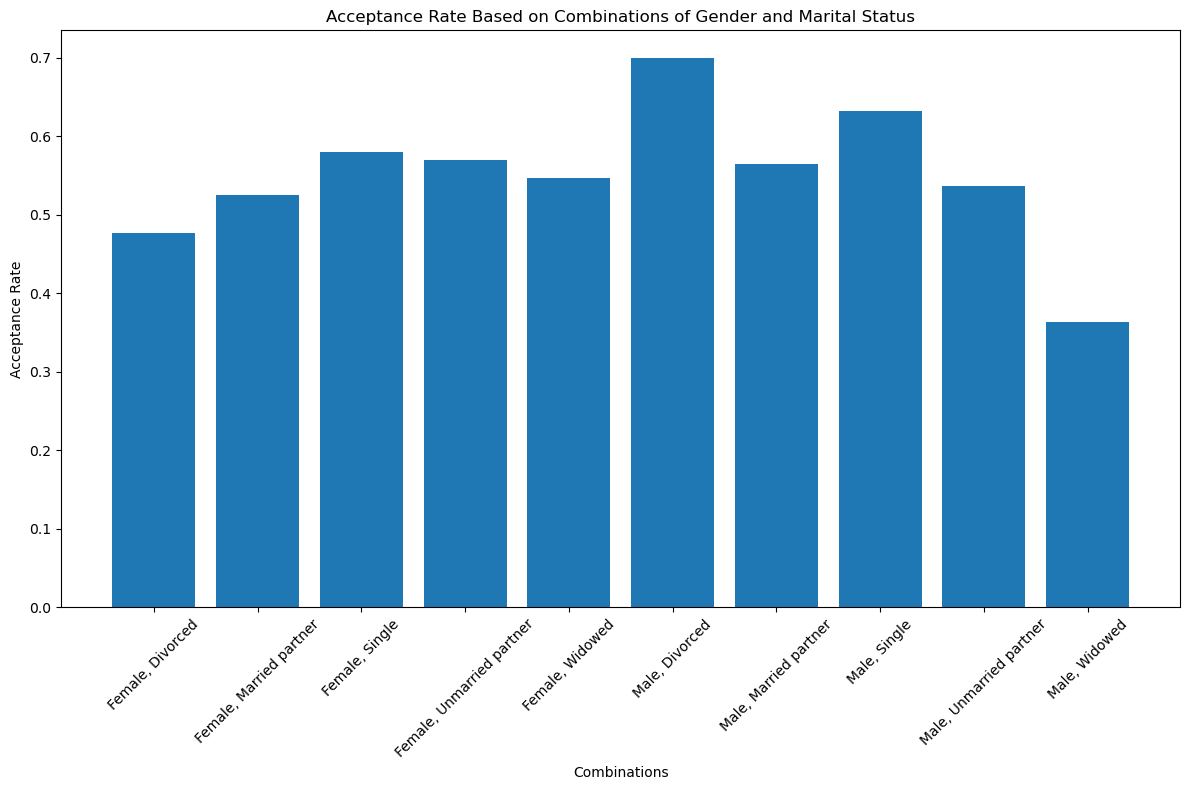

In [334]:
# Explore interactions between  gender', 'maritalStatus

# Create DataFrame
Carry_coupons = pd.DataFrame(data)

# Calculate acceptance rate based on combinations of gender and marital status
acceptance_rate = Carry_coupons.pivot_table(index=['gender', 'maritalStatus'], values='Coupon accep', aggfunc='mean')

# Reset index to make the DataFrame more readable
acceptance_rate.reset_index(inplace=True)

# Visualize the acceptance rate using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(acceptance_rate)), acceptance_rate['Coupon accep'])
plt.xlabel('Combinations')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Based on Combinations of Gender and Marital Status')
plt.xticks(range(len(acceptance_rate)), acceptance_rate.apply(lambda x: f"{x['gender']}, {x['maritalStatus']}", axis=1), rotation=45)
plt.tight_layout()
print(acceptance_rate)
plt.show()


In [ ]:
#interesting finding Male           Divorced      0.700000  highest acceptance rate , followed by single male

   gender  time  Coupon accep
0  Female  10AM      0.586144
1  Female  10PM      0.467146
2  Female   2PM      0.664653
3  Female   6PM      0.563442
4  Female   7AM      0.478937
5    Male  10AM      0.630537
6    Male  10PM      0.566200
7    Male   2PM      0.656555
8    Male   6PM      0.603634
9    Male   7AM      0.530047


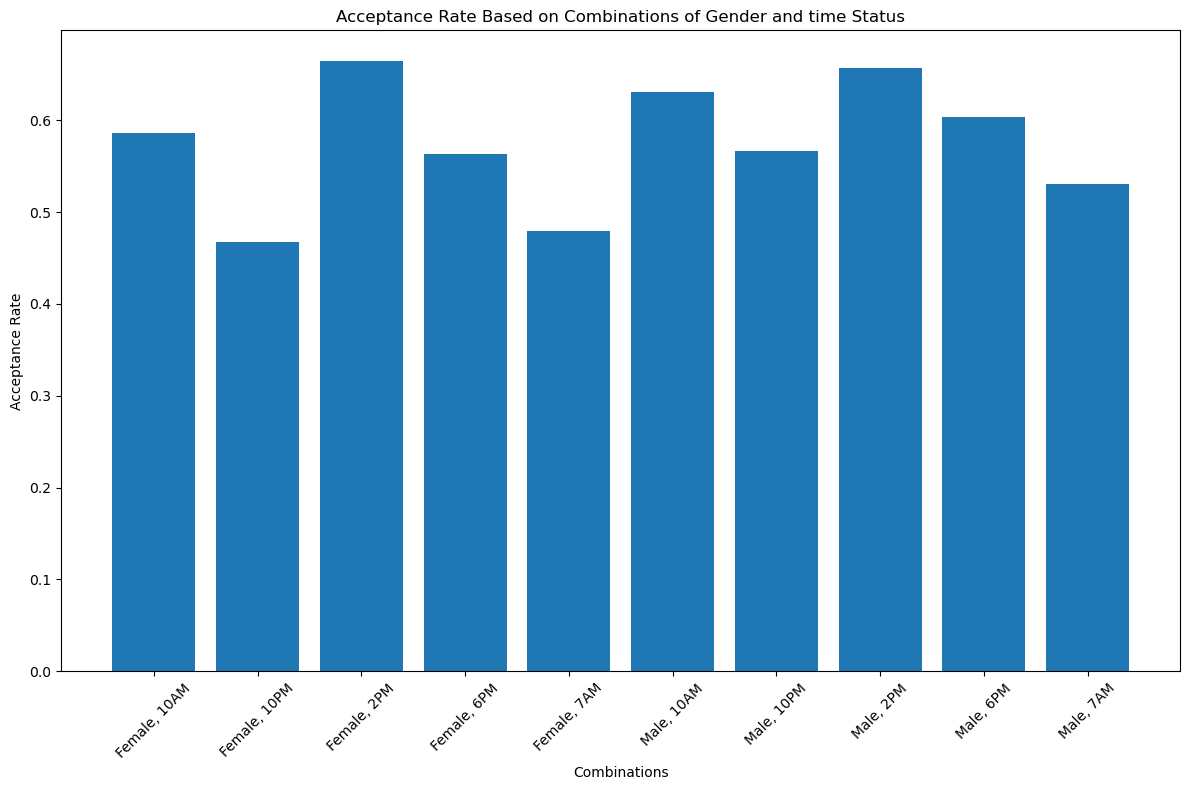

In [284]:
#time
# Explore interactions between  gender', 'time

# Create DataFrame
Carry_coupons = pd.DataFrame(data)

# Calculate acceptance rate based on combinations of gender and time 
acceptance_rate = Carry_coupons.pivot_table(index=['gender', 'time'], values='Coupon accep', aggfunc='mean')

# Reset index to make the DataFrame more readable
acceptance_rate.reset_index(inplace=True)

# Visualize the acceptance rate using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(acceptance_rate)), acceptance_rate['Coupon accep'])
plt.xlabel('Combinations')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Based on Combinations of Gender and time Status')
plt.xticks(range(len(acceptance_rate)), acceptance_rate.apply(lambda x: f"{x['gender']}, {x['time']}", axis=1), rotation=45)
plt.tight_layout()
print(acceptance_rate)
plt.show()


To analyze how the acceptance rate 'Coupon accep' varies based on combinations of 'gender', 'age', 'maritalStatus', etc. in the DataFrame Carry_coupons and visualize the results, you can use a combination of pivot tables and plotting

In [289]:
# Load the data
Carry_coupons = pd.DataFrame(data)

# Select columns of interest
selected_columns = ['gender', 'age', 'maritalStatus', 'Coupon accep']
selected_data = Carry_coupons[selected_columns]

# One-hot encode categorical variables
selected_data_encoded = pd.get_dummies(selected_data)

# Perform correlation analysis
correlation = selected_data_encoded.corr()

# Print correlation with the target variable ('Coupon accep')
print("\nCorrelation with 'Coupon accep':")
print(correlation['Coupon accep'])


Correlation with 'Coupon accep':
Coupon accep                       1.000000
gender_Female                     -0.045261
gender_Male                        0.045261
age_20                             0.026802
age_21                             0.025693
age_26                             0.030662
age_31                            -0.015060
age_36                            -0.021043
age_41                             0.003336
age_46                             0.003639
age_50                            -0.051087
maritalStatus_Divorced            -0.018349
maritalStatus_Married partner     -0.043500
maritalStatus_Single               0.064724
maritalStatus_Unmarried partner   -0.012475
maritalStatus_Widowed             -0.018628
Name: Coupon accep, dtype: float64


 I will create a heatmap visualizing the correlation between features and the target variable ('Coupon accep'). Each cell in the heatmap represents the correlation coefficient between two features, with higher values indicating stronger correlations. The color intensity represents the strength and direction of the correlation.

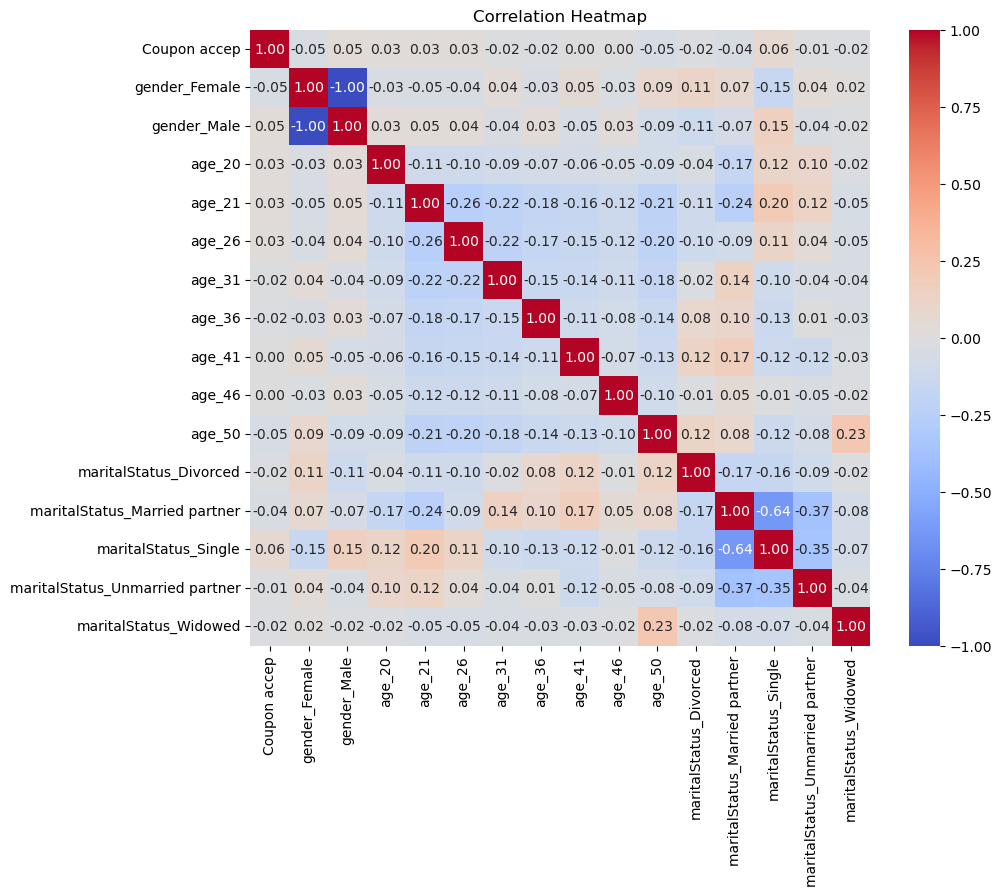

In [290]:
# Load the data
Carry_coupons = pd.DataFrame(data)

# Select columns of interest
selected_columns = ['gender', 'age', 'maritalStatus', 'Coupon accep']
selected_data = Carry_coupons[selected_columns]

# One-hot encode categorical variables
selected_data_encoded = pd.get_dummies(selected_data)

# Perform correlation analysis
correlation = selected_data_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

   weather      maritalStatus  Coupon accep
12   Sunny             Single      0.632039
13   Sunny  Unmarried partner      0.583594
11   Sunny    Married partner      0.572503
10   Sunny           Divorced      0.542579
7    Snowy             Single      0.540816
2    Rainy             Single      0.506818
5    Snowy           Divorced      0.488889
14   Sunny            Widowed      0.487500
3    Rainy  Unmarried partner      0.457547
8    Snowy  Unmarried partner      0.456067
4    Rainy            Widowed      0.428571
9    Snowy            Widowed      0.428571
6    Snowy    Married partner      0.427256
1    Rainy    Married partner      0.424942
0    Rainy           Divorced      0.416667


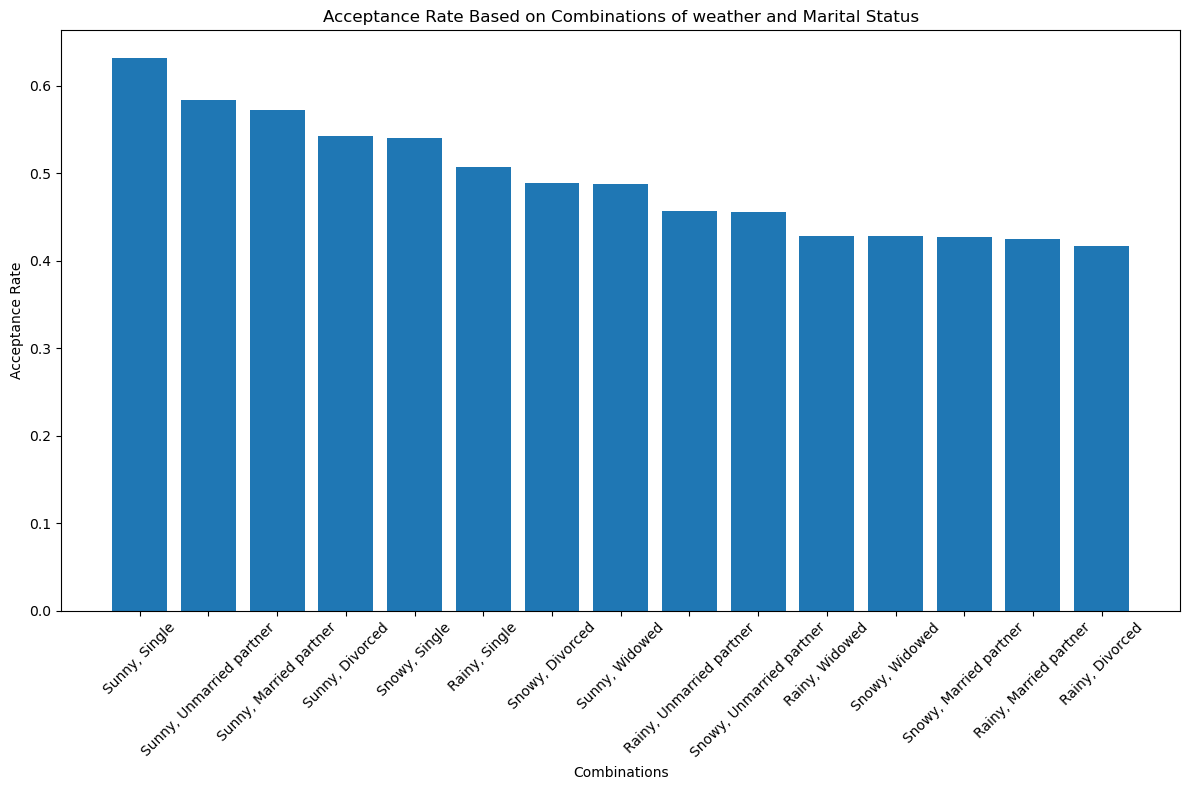

In [293]:
# Explore interactions between  weather', 'maritalStatus

# Create DataFrame
Carry_coupons = pd.DataFrame(data)

# Calculate acceptance rate based on combinations of weather and marital status
acceptance_rate = Carry_coupons.pivot_table(index=['weather', 'maritalStatus'], values='Coupon accep', aggfunc='mean')

# Reset index to make the DataFrame more readable
acceptance_rate.reset_index(inplace=True)

# Sort by acceptance rate
acceptance_rate.sort_values(by='Coupon accep', ascending=False, inplace=True)

# Visualize the acceptance rate using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(acceptance_rate)), acceptance_rate['Coupon accep'])
plt.xlabel('Combinations')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Based on Combinations of weather and Marital Status')
plt.xticks(range(len(acceptance_rate)), acceptance_rate.apply(lambda x: f"{x['weather']}, {x['maritalStatus']}", axis=1), rotation=45)
plt.tight_layout()
print(acceptance_rate)
plt.show()


   weather      maritalStatus  Coupon accep
12   Sunny             Single      0.632039
13   Sunny  Unmarried partner      0.583594
11   Sunny    Married partner      0.572503
10   Sunny           Divorced      0.542579
7    Snowy             Single      0.540816
2    Rainy             Single      0.506818
5    Snowy           Divorced      0.488889
14   Sunny            Widowed      0.487500
3    Rainy  Unmarried partner      0.457547
8    Snowy  Unmarried partner      0.456067
4    Rainy            Widowed      0.428571
9    Snowy            Widowed      0.428571
6    Snowy    Married partner      0.427256
1    Rainy    Married partner      0.424942
0    Rainy           Divorced      0.416667


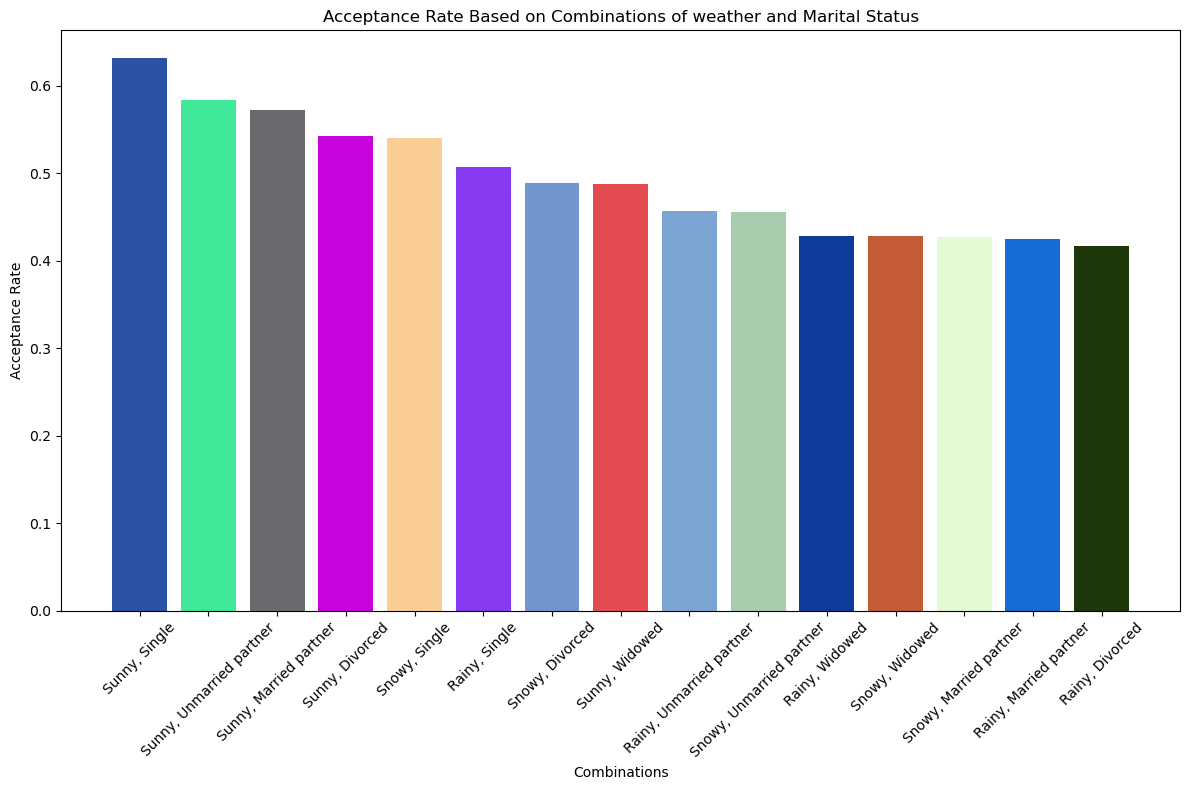

In [294]:
# repeat with sort and color

# Create DataFrame 
Carry_coupons = pd.DataFrame(data)

# Calculate acceptance rate based on combinations of weather and marital status
acceptance_rate = Carry_coupons.pivot_table(index=['weather', 'maritalStatus'], values='Coupon accep', aggfunc='mean')

# Reset index to make the DataFrame more readable
acceptance_rate.reset_index(inplace=True)

# Sort by acceptance rate
acceptance_rate.sort_values(by='Coupon accep', ascending=False, inplace=True)

# Generate random colors
num_bars = len(acceptance_rate)
random_colors = np.random.rand(num_bars, 3)

# Visualize the acceptance rate using a bar plot with random colors
plt.figure(figsize=(12, 8))
plt.bar(range(len(acceptance_rate)), acceptance_rate['Coupon accep'], color=random_colors)
plt.xlabel('Combinations')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Based on Combinations of weather and Marital Status')
plt.xticks(range(len(acceptance_rate)), acceptance_rate.apply(lambda x: f"{x['weather']}, {x['maritalStatus']}", axis=1), rotation=45)
plt.tight_layout()
print(acceptance_rate)
plt.show()

    temperature age  Coupon accep
16           80  20      0.712598
18           80  26      0.640095
22           80  46      0.626866
0            30  20      0.601695
19           80  31      0.599587
9            55  21      0.598446
17           80  21      0.597778
21           80  41      0.596226
20           80  36      0.574534
1            30  21      0.573494
13           55  41      0.569405
10           55  26      0.556319
2            30  26      0.551980
4            30  36      0.550201
14           55  46      0.538117
7            30  50      0.530864
11           55  31      0.522361
5            30  41      0.521978
23           80  50      0.521191
8            55  20      0.507576
6            30  46      0.500000
3            30  31      0.478589
15           55  50      0.471028
12           55  36      0.466667


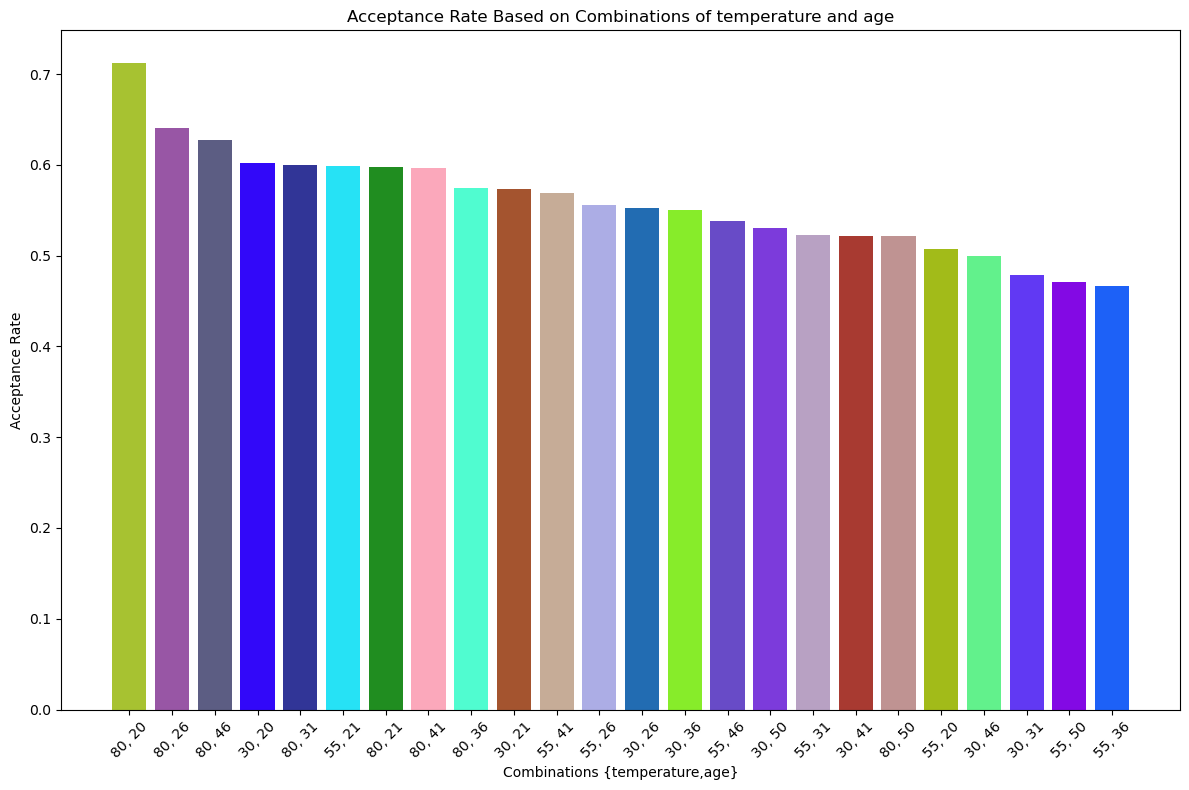

In [297]:
# repeat with tempreture and age

# Create DataFrame 
Carry_coupons = pd.DataFrame(data)

# Calculate acceptance rate based on combinations of weather and marital status
acceptance_rate = Carry_coupons.pivot_table(index=['temperature', 'age'], values='Coupon accep', aggfunc='mean')

# Reset index to make the DataFrame more readable
acceptance_rate.reset_index(inplace=True)

# Sort by acceptance rate
acceptance_rate.sort_values(by='Coupon accep', ascending=False, inplace=True)

# Generate random colors
num_bars = len(acceptance_rate)
random_colors = np.random.rand(num_bars, 3)

# Visualize the acceptance rate using a bar plot with random colors
plt.figure(figsize=(12, 8))
plt.bar(range(len(acceptance_rate)), acceptance_rate['Coupon accep'], color=random_colors)
plt.xlabel('Combinations {temperature,age}')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Based on Combinations of temperature and age')
plt.xticks(range(len(acceptance_rate)), acceptance_rate.apply(lambda x: f"{x['temperature']}, {x['age']}", axis=1), rotation=45)
plt.tight_layout()
print(acceptance_rate)
plt.show()

In [ ]:
# Observation drivers at warm weather and under 50 are more likely to accept coupon 

